In [ ]:
# Checking for missing values in the dataset
missing_values = data_new.isnull().sum()
missing_values[missing_values > 0]

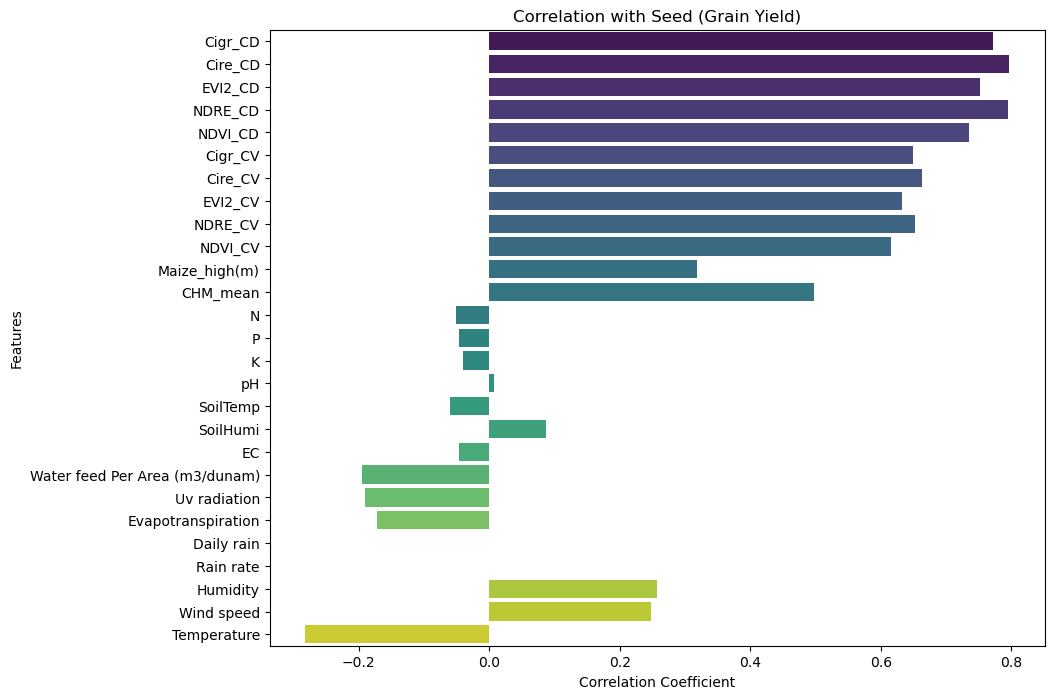

Cigr_CD    0.771224
Cire_CD    0.796832
EVI2_CD    0.752056
NDRE_CD    0.795031
NDVI_CD    0.735459
Cigr_CV    0.649630
Cire_CV    0.662580
EVI2_CV    0.632445
NDRE_CV    0.652616
NDVI_CV    0.615103
Name: Seed, dtype: float64

In [4]:
# Importing the necessary library for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Defining the file path for the new CSV file
file_path_new = "C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V8_CV_ALL.csv"

# Loading the new CSV file
data_new = pd.read_csv(file_path_new)

# Displaying the first few rows of the new dataset
data_new.head()



# Dropping the "id" and "Plot_Name" columns
data_new = data_new.drop(columns=['id', 'Plot_Name'])

# Displaying the first few rows after dropping the unnecessary columns
data_new.head()


# Calculating the correlation with the "Seed" column
correlation_with_seed = data_new.corr()['Seed'].drop('Seed')

# Plotting the correlation values
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_seed.values, y=correlation_with_seed.index, palette="viridis")
plt.title('Correlation with Seed (Grain Yield)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

# Returning the features that have a high correlation (absolute value greater than 0.5) with "Seed"
high_correlation_features = correlation_with_seed[correlation_with_seed.abs() > 0.5]
high_correlation_features


Steps for Scenario 1:
1. Select Features: CIgr_CD, CIre_CD, EVI2_CD, NDRE_CD, NDVI_CD
2. Split Data: Divide the data into training and testing sets.
3. Scale Features: Apply feature scaling if needed.
4. Train Models: Train various regression models, including CatBoost, Decision Tree, ElasticNet, Gradient Boosting, Huber, KNN, Lasso, Linear Regression, M-estimators, Passive Aggressive, Random Forest, Ridge, SVR, and XGBoost.
5. Evaluate Performance: Evaluate the performance using MAE, MSE, RMSE, and R2 score.

The data for Scenario 1 has been successfully preprocessed, and we have:

Training set with 36 samples and 5 features
Testing set with 9 samples and 5 features

c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


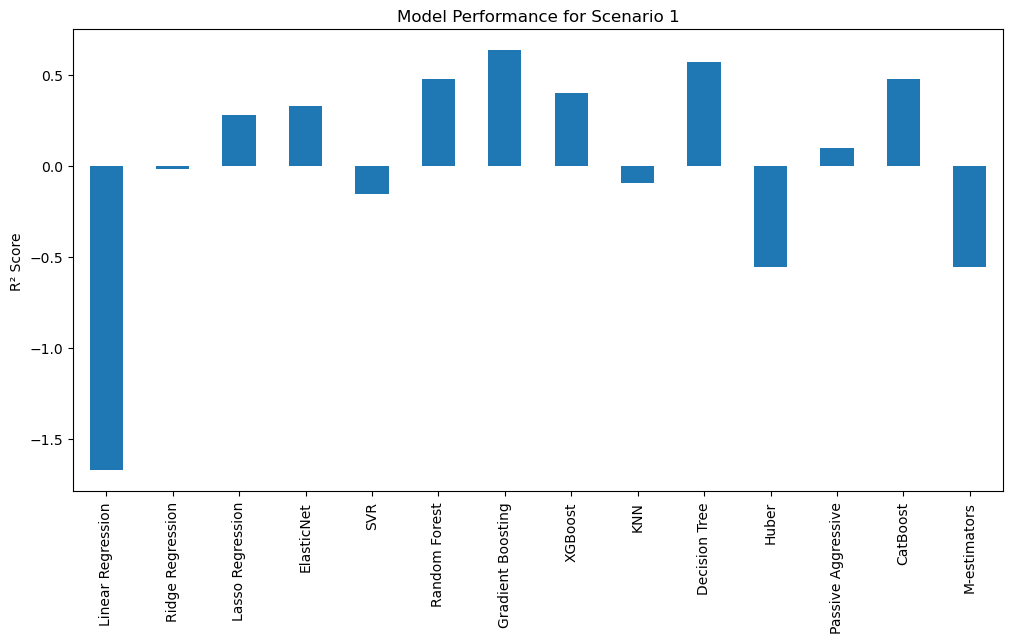

In [21]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, PassiveAggressiveRegressor, RANSACRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import numpy as np

# Read CSV File
file_path = "C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V8_CV_ALL.csv"
df = pd.read_csv(file_path)

# Data Preprocessing for Scenario 1
columns_to_drop = ['id', 'Plot_Name']
df = df.drop(columns=columns_to_drop)
df = df.dropna()  # Handle missing values
y = df['Seed']
X = df.drop(columns=['Seed'])
X_train_scenario_1, X_test_scenario_1, y_train_scenario_1, y_test_scenario_1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Models Definition
models_scenario_1 = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("ElasticNet", ElasticNet()),
    ("SVR", SVR()),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("XGBoost", XGBRegressor(random_state=42)),
    ("KNN", KNeighborsRegressor()),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("Huber", HuberRegressor()),
    ("Passive Aggressive", PassiveAggressiveRegressor(random_state=42)),
    ("CatBoost", CatBoostRegressor(verbose=0, random_state=42)), # CatBoost
    ("M-estimators", RANSACRegressor(random_state=42)), # M-estimators
]

# Training and Evaluating Models
results_scenario_1 = {}
for name, model in models_scenario_1:
    model.fit(X_train_scenario_1, y_train_scenario_1)
    y_pred = model.predict(X_test_scenario_1)
    mae = mean_absolute_error(y_test_scenario_1, y_pred)
    mse = mean_squared_error(y_test_scenario_1, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_scenario_1, y_pred)
    results_scenario_1[name] = [mae, mse, rmse, r2]

# Save Results to CSV
results_scenario_1_df = pd.DataFrame(results_scenario_1, index=['MAE', 'MSE', 'RMSE', 'R2'])
results_scenario_1_df.to_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/14ML_results_scenario_1.csv")

# Visualize Results
r2_scores = results_scenario_1_df.loc['R2']
r2_scores.plot(kind='bar', figsize=(12, 6))
plt.ylabel('R² Score')
plt.title('Model Performance for Scenario 1')
plt.show()


MAE        MSE      RMSE        R2
Linear Regression                2.149792   6.864304  2.619982  0.329383
Ridge Regression                 2.176360   6.387385  2.527328  0.375976
Lasso Regression                 2.512647   7.808705  2.794406  0.237118
ElasticNet                       2.431812   7.564818  2.750422  0.260945
Support Vector Regression (SVR)  2.396239   7.714361  2.777474  0.246335
Random Forest                    2.417111   8.108390  2.847524  0.207840
Gradient Boosting                2.707482  11.443346  3.382801 -0.117973
XGBoost                          2.981780  12.525119  3.539085 -0.223658
K-Nearest Neighbors (KNN)        2.146667   5.647378  2.376421  0.448272
Decision Tree                    2.666667  12.237778  3.498254 -0.195586
Huber Regression                 2.267030   7.528802  2.743866  0.264464
Passive Aggressive Regression    2.301096   6.492900  2.548117  0.365668

Scenario 2

Certainly! For Scenario 2, we'll use the 5 vegetation indices (VI) based on canopy density (CD) along with all the available environmental data to predict the grain yield (Seed) of maize.

We'll follow these steps:
1. **Prepare the Data**: Select the features related to the 5 VI based on CD, along with all environmental data.
2. **Split the Data**: Divide the dataset into training and testing sets.
3. **Train and Evaluate Models**: Train various regression models, including Linear Regression, Ridge Regression, Lasso Regression, ElasticNet, SVR, Random Forest, Gradient Boosting, XGBoost, KNN, Decision Tree, Huber, Passive Aggressive, CatBoost, and M-estimators, and evaluate their performance using MAE, MSE, RMSE, and R².
4. **Visualize and Analyze the Results**: Plot the R² scores and analyze the best and worst-performing models.

Let's start by preparing the data for Scenario 2 and defining the models for this scenario.

It appears that the code execution state has been reset, which means we've lost the current context and variables. I apologize for the inconvenience.

To continue with Scenario 2, we'll need to perform the following steps:
1. Read the CSV file again.
2. Preprocess the data (including handling missing values and dropping unnecessary columns).
3. Define the models.
4. Prepare the data for Scenario 2.
5. Train and evaluate the models.



In [27]:
# Reading the CSV file
file_path = "C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V6_CV_ALL.csv" # Change this to the correct path
df = pd.read_csv(file_path)

df.columns

Index(['id', 'Plot_Name', 'Seed', 'Cigr_CD', 'Cire_CD', 'EVI2_CD', 'NDRE_CD',
       'NDVI_CD', 'Cigr_CV', 'Cire_CV', 'EVI2_CV', 'NDRE_CV', 'NDVI_CV',
       'Maize_high(m)', 'CHM_mean', 'N', 'P', 'K', 'pH', 'SoilTemp',
       'SoilHumi', 'EC', 'Water feed Per Area (m3/dunam)', 'Uv radiation',
       'Evapotranspiration', 'Daily rain', 'Rain rate', 'Humidity',
       'Wind speed', 'Temperature'],
      dtype='object')

Scenario 1:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.992573   6.081990  2.466169  0.405812
Decision Tree       1.933333   5.337778  2.310363  0.478519
ElasticNet          2.714515   9.135805  3.022549  0.107466
Gradient Boosting   1.541354   3.583526  1.893020  0.649903
Huber               2.690763  12.087772  3.476747 -0.180931
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    2.687366   8.982162  2.997026  0.122476
Linear Regression   3.030038  12.254577  3.500654 -0.197227
M-estimators        3.425211  15.584946  3.947777 -0.522592
Passive Aggressive  2.801815   9.972309  3.157896  0.025742
Random Forest       1.678111   4.459905  2.111849  0.564284
Ridge Regression    2.637675  10.257847  3.202787 -0.002154
SVR                 3.070072  11.847727  3.442053 -0.157479
XGBoost             1.736949   3.787641  1.946186  0.629961

--------------------------------------------------

Scenario 2:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.906897   5.255329  2.292451  0.486574
Decision Tree       1.666667   4.540000  2.130728  0.556459
ElasticNet          3.082686  11.845379  3.441712 -0.157250
Gradient Boosting   1.461276   2.759094  1.661052  0.730447
Huber               4.427211  25.140855  5.014066 -1.456168
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    3.173584  12.422167  3.524509 -0.213600
Linear Regression   2.798957  10.532758  3.245421 -0.029011
M-estimators        4.013688  24.319718  4.931503 -1.375946
Passive Aggressive  2.813126  10.043256  3.169110  0.018811
Random Forest       1.808778   4.572036  2.138232  0.553329
Ridge Regression    3.350937  14.076540  3.751872 -0.375226
SVR                 3.070943  11.854377  3.443019 -0.158129
XGBoost             1.465892   2.767532  1.663590  0.729622

--------------------------------------------------

Scenario 3:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            2.147053   6.601323  2.569304  0.355075
Decision Tree       1.933333   5.337778  2.310363  0.478519
ElasticNet          3.057076  11.625207  3.409576 -0.135740
Gradient Boosting   1.576589   3.637060  1.907108  0.644673
Huber               3.266932  17.577394  4.192540 -0.717246
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    3.173584  12.422167  3.524509 -0.213600
Linear Regression   3.331299  16.637674  4.078931 -0.625439
M-estimators        4.604538  32.676758  5.716359 -2.192398
Passive Aggressive  2.812319  10.039436  3.168507  0.019184
Random Forest       1.876667   5.322012  2.306949  0.480059
Ridge Regression    3.172940  14.793756  3.846265 -0.445295
SVR                 3.070816  11.853365  3.442872 -0.158030
XGBoost             1.854484   4.696329  2.167101  0.541186

--------------------------------------------------

Scenario 4:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.672385   4.457510  2.111282  0.564518
Decision Tree       1.477778   3.201111  1.789165  0.687263
ElasticNet          3.082686  11.845379  3.441712 -0.157250
Gradient Boosting   1.481518   3.620783  1.902836  0.646263
Huber               5.247322  31.495049  5.612045 -2.076950
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    3.173584  12.422167  3.524509 -0.213600
Linear Regression   2.817221  10.925106  3.305315 -0.067342
M-estimators        3.130752  14.183226  3.766062 -0.385649
Passive Aggressive  2.814073  10.048984  3.170013  0.018251
Random Forest       1.705222   4.577611  2.139535  0.552784
Ridge Regression    4.016662  19.072319  4.367187 -0.863295
SVR                 3.071310  11.856614  3.443343 -0.158347
XGBoost             1.515077   3.145600  1.773584  0.692687

--------------------------------------------------

Scenario 5:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            2.102767   6.659172  2.580537  0.349424
Decision Tree       1.888889   4.700000  2.167948  0.540827
ElasticNet          3.082686  11.845379  3.441712 -0.157250
Gradient Boosting   1.703801   4.309071  2.075830  0.579020
Huber               5.911872  41.129708  6.413245 -3.018220
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    3.173584  12.422167  3.524509 -0.213600
Linear Regression   3.373254  18.006359  4.243390 -0.759155
M-estimators        3.436115  19.525330  4.418748 -0.907552
Passive Aggressive  2.813905  10.048044  3.169865  0.018343
Random Forest       1.896222   5.537765  2.353246  0.458981
Ridge Regression    3.822261  18.080280  4.252091 -0.766376
SVR                 3.070980  11.854628  3.443055 -0.158153
XGBoost             1.803889   4.531080  2.128633  0.557330

--------------------------------------------------

Scenario 1:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.992573   6.081990  2.466169  0.405812
Decision Tree       1.933333   5.337778  2.310363  0.478519
ElasticNet          2.714515   9.135805  3.022549  0.107466
Gradient Boosting   1.541354   3.583526  1.893020  0.649903
Huber               2.690763  12.087772  3.476747 -0.180931
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    2.687366   8.982162  2.997026  0.122476
Linear Regression   3.030038  12.254577  3.500654 -0.197227
M-estimators        3.425211  15.584946  3.947777 -0.522592
Passive Aggressive  2.801815   9.972309  3.157896  0.025742
Random Forest       1.678111   4.459905  2.111849  0.564284
Ridge Regression    2.637675  10.257847  3.202787 -0.002154
SVR                 3.070072  11.847727  3.442053 -0.157479
XGBoost             1.736949   3.787641  1.946186  0.629961


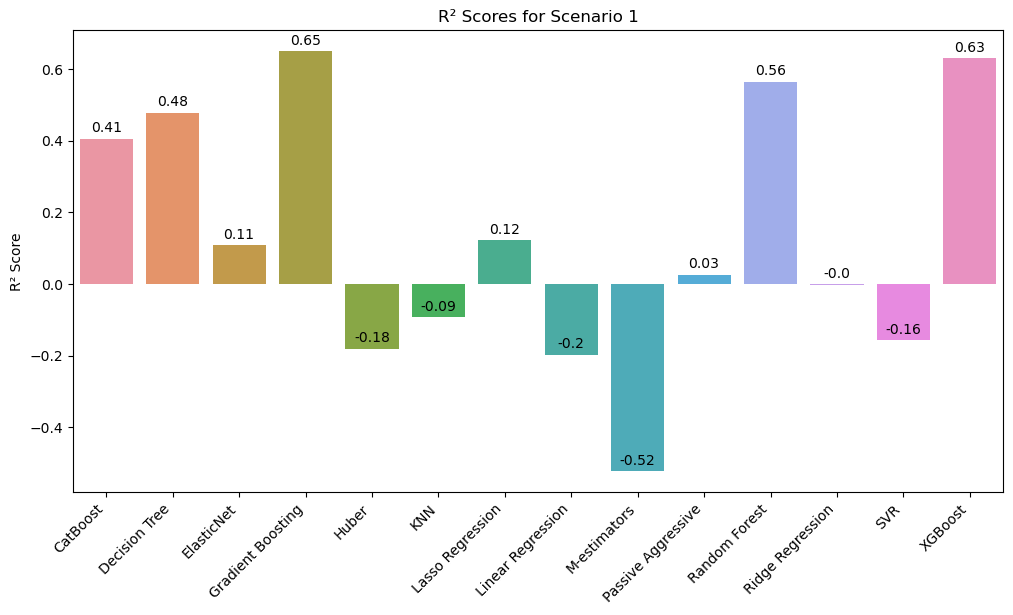


--------------------------------------------------

Scenario 2:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.906897   5.255329  2.292451  0.486574
Decision Tree       1.666667   4.540000  2.130728  0.556459
ElasticNet          3.082686  11.845379  3.441712 -0.157250
Gradient Boosting   1.461276   2.759094  1.661052  0.730447
Huber               4.427211  25.140855  5.014066 -1.456168
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    3.173584  12.422167  3.524509 -0.213600
Linear Regression   2.798957  10.532758  3.245421 -0.029011
M-estimators        4.013688  24.319718  4.931503 -1.375946
Passive Aggressive  2.813126  10.043256  3.169110  0.018811
Random Forest       1.808778   4.572036  2.138232  0.553329
Ridge Regression    3.350937  14.076540  3.751872 -0.375226
SVR                 3.070943  11.854377  3.443019 -0.158129
XGBoost             1.465892   2.767532  1.663590  0.729622


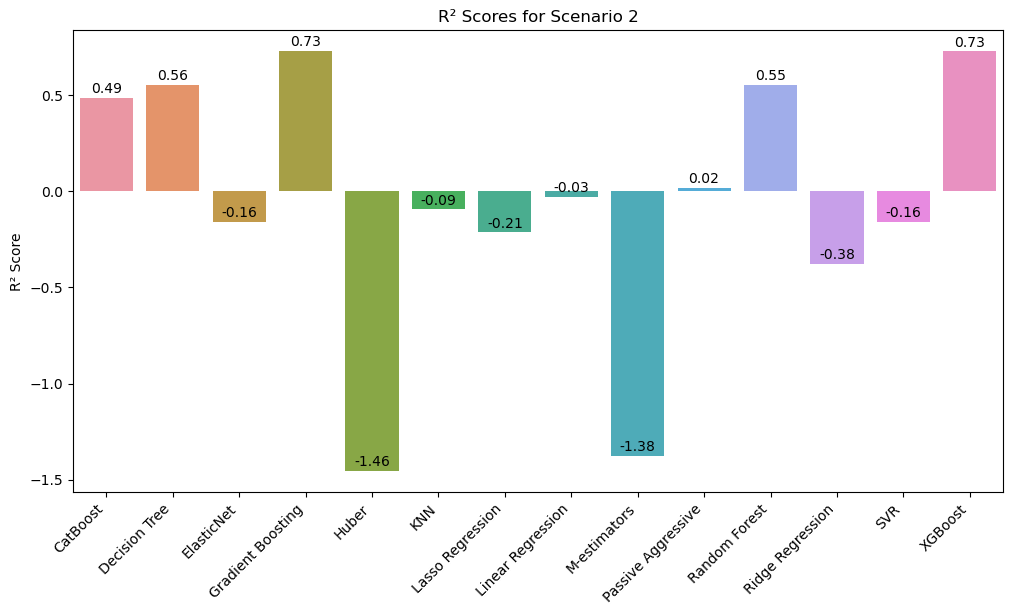


--------------------------------------------------

Scenario 3:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            2.147053   6.601323  2.569304  0.355075
Decision Tree       1.933333   5.337778  2.310363  0.478519
ElasticNet          3.057076  11.625207  3.409576 -0.135740
Gradient Boosting   1.576589   3.637060  1.907108  0.644673
Huber               3.266932  17.577394  4.192540 -0.717246
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    3.173584  12.422167  3.524509 -0.213600
Linear Regression   3.331299  16.637674  4.078931 -0.625439
M-estimators        4.604538  32.676758  5.716359 -2.192398
Passive Aggressive  2.812319  10.039436  3.168507  0.019184
Random Forest       1.876667   5.322012  2.306949  0.480059
Ridge Regression    3.172940  14.793756  3.846265 -0.445295
SVR                 3.070816  11.853365  3.442872 -0.158030
XGBoost             1.854484   4.696329  2.167101  0.541186


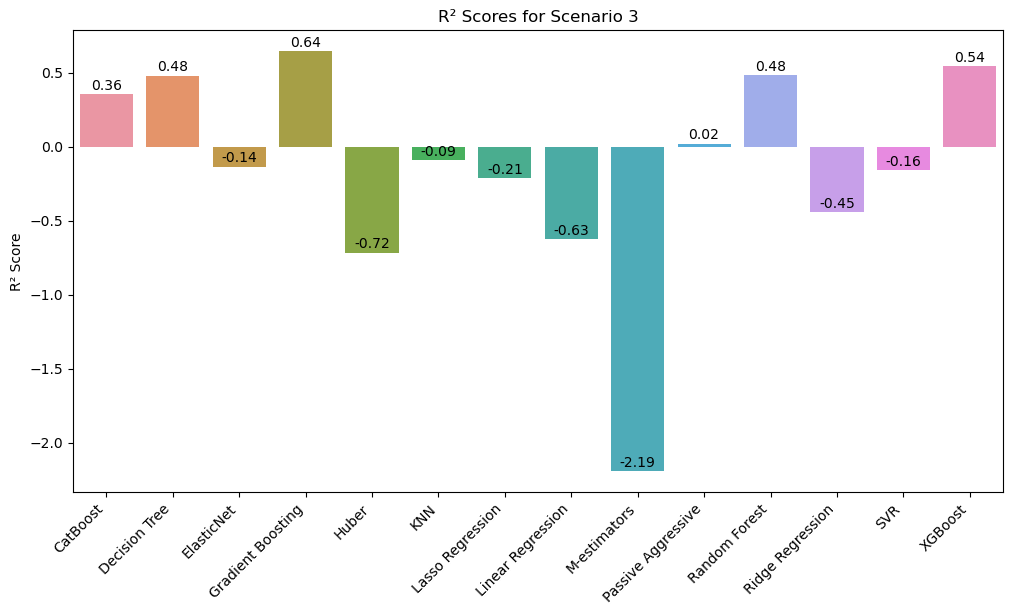


--------------------------------------------------

Scenario 4:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.672385   4.457510  2.111282  0.564518
Decision Tree       1.477778   3.201111  1.789165  0.687263
ElasticNet          3.082686  11.845379  3.441712 -0.157250
Gradient Boosting   1.481518   3.620783  1.902836  0.646263
Huber               5.247322  31.495049  5.612045 -2.076950
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    3.173584  12.422167  3.524509 -0.213600
Linear Regression   2.817221  10.925106  3.305315 -0.067342
M-estimators        3.130752  14.183226  3.766062 -0.385649
Passive Aggressive  2.814073  10.048984  3.170013  0.018251
Random Forest       1.705222   4.577611  2.139535  0.552784
Ridge Regression    4.016662  19.072319  4.367187 -0.863295
SVR                 3.071310  11.856614  3.443343 -0.158347
XGBoost             1.515077   3.145600  1.773584  0.692687


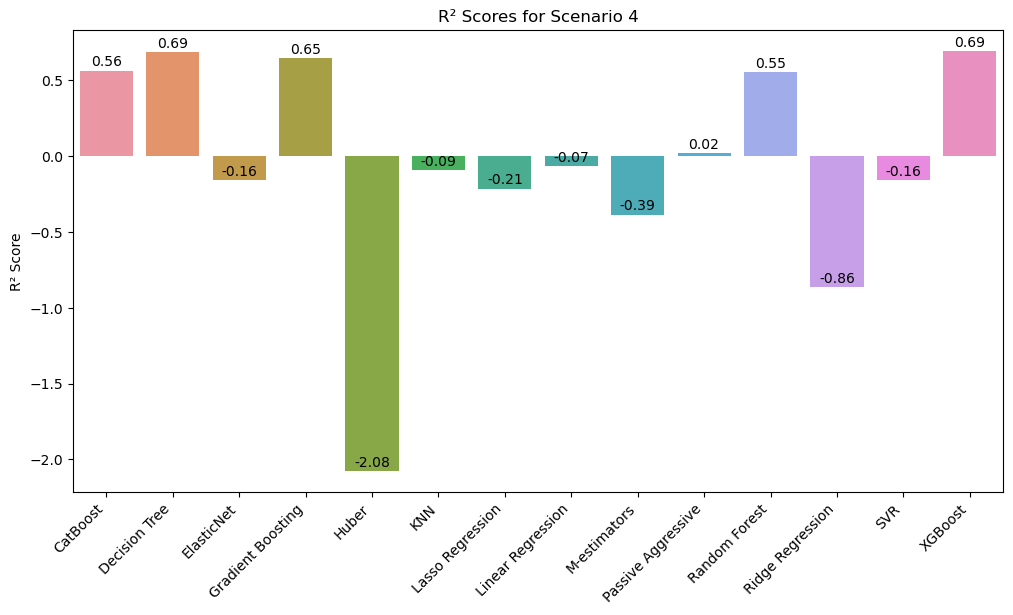


--------------------------------------------------

Scenario 5:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            2.102767   6.659172  2.580537  0.349424
Decision Tree       1.888889   4.700000  2.167948  0.540827
ElasticNet          3.082686  11.845379  3.441712 -0.157250
Gradient Boosting   1.703801   4.309071  2.075830  0.579020
Huber               5.911872  41.129708  6.413245 -3.018220
KNN                 3.100000  11.194533  3.345823 -0.093664
Lasso Regression    3.173584  12.422167  3.524509 -0.213600
Linear Regression   3.373254  18.006359  4.243390 -0.759155
M-estimators        3.436115  19.525330  4.418748 -0.907552
Passive Aggressive  2.813905  10.048044  3.169865  0.018343
Random Forest       1.896222   5.537765  2.353246  0.458981
Ridge Regression    3.822261  18.080280  4.252091 -0.766376
SVR                 3.070980  11.854628  3.443055 -0.158153
XGBoost             1.803889   4.531080  2.128633  0.557330


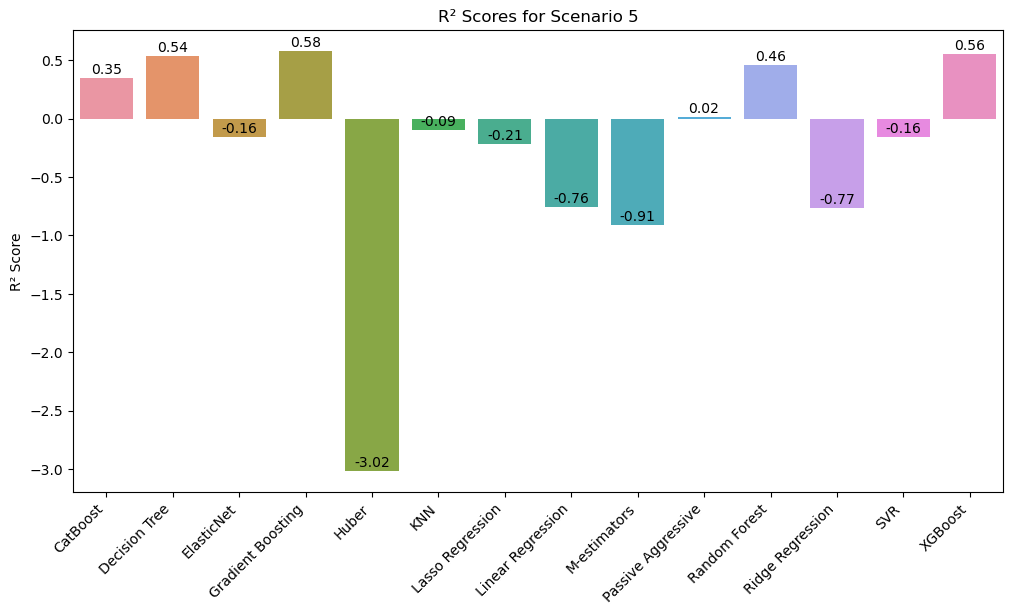


--------------------------------------------------



In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, PassiveAggressiveRegressor, RANSACRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

# Reading the CSV file
file_path = "C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V6_CV_ALL.csv" # Change this to the correct path
df = pd.read_csv(file_path)

# Data Preprocessing: Dropping unnecessary columns and handling missing values
columns_to_drop = ['id', 'Plot_Name']
df = df.drop(columns=columns_to_drop)
df = df.dropna()  # Handle missing values

# Models Definition 
models = [
    ("CatBoost", CatBoostRegressor(verbose=0, random_state=42)),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("ElasticNet", ElasticNet()),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("Huber", HuberRegressor()),
    ("KNN", KNeighborsRegressor()),
    ("Lasso Regression", Lasso()),
    ("Linear Regression", LinearRegression()),
    ("M-estimators", RANSACRegressor(random_state=42)),
    ("Passive Aggressive", PassiveAggressiveRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Ridge Regression", Ridge()),
    ("SVR", SVR()),
    ("XGBoost", XGBRegressor(random_state=42))

]

# Scenario 2: Using each VI based on CD with all environmental data #, 'Maize_high(m)' , 'CHM_mean'
scenarios = [
    ['Cigr_CD', 'N', 'P', 'K', 'pH', 'SoilTemp',
       'SoilHumi', 'EC', 'Water feed Per Area (m3/dunam)', 'Uv radiation',
       'Evapotranspiration', 'Daily rain', 'Rain rate', 'Humidity',
       'Wind speed', 'Temperature'],
    ['Cire_CD', 'N', 'P', 'K', 'pH', 'SoilTemp',
       'SoilHumi', 'EC', 'Water feed Per Area (m3/dunam)', 'Uv radiation',
       'Evapotranspiration', 'Daily rain', 'Rain rate', 'Humidity',
       'Wind speed', 'Temperature'],
    ['EVI2_CD', 'N', 'P', 'K', 'pH', 'SoilTemp',
       'SoilHumi', 'EC', 'Water feed Per Area (m3/dunam)', 'Uv radiation',
       'Evapotranspiration', 'Daily rain', 'Rain rate', 'Humidity',
       'Wind speed', 'Temperature'],
    ['NDRE_CD', 'N', 'P', 'K', 'pH', 'SoilTemp',
       'SoilHumi', 'EC', 'Water feed Per Area (m3/dunam)', 'Uv radiation',
       'Evapotranspiration', 'Rain rate', 'Humidity',
       'Wind speed', 'Temperature'],
    ['NDVI_CD', 'N', 'P', 'K', 'pH', 'SoilTemp',
       'SoilHumi', 'EC', 'Water feed Per Area (m3/dunam)', 'Uv radiation',
       'Evapotranspiration', 'Daily rain', 'Rain rate', 'Humidity',
       'Wind speed', 'Temperature']
]

# Loop through scenarios and evaluate the models
for i, scenario in enumerate(scenarios):
    print(f"Scenario {i+1}:")
    X_scenario = df[scenario]
    y_scenario = df['Seed']
    X_train_scenario, X_test_scenario, y_train_scenario, y_test_scenario = train_test_split(X_scenario, y_scenario, test_size=0.2, random_state=42)
    results_scenario = {}
    for name, model in models:
        results_scenario[name] = train_and_evaluate_model(model, X_train_scenario, y_train_scenario, X_test_scenario, y_test_scenario)
    results_scenario_df = pd.DataFrame(results_scenario, index=['MAE', 'MSE', 'RMSE', 'R2'])
    print(results_scenario_df.T)
    print("\n" + "-"*50 + "\n")



# Loop through scenarios and evaluate the models
for i, scenario in enumerate(scenarios):
    print(f"Scenario {i+1}:")
    X_scenario = df[scenario]
    y_scenario = df['Seed']
    X_train_scenario, X_test_scenario, y_train_scenario, y_test_scenario = train_test_split(X_scenario, y_scenario, test_size=0.2, random_state=42)
    results_scenario = {}
    for name, model in models:
        results_scenario[name] = train_and_evaluate_model(model, X_train_scenario, y_train_scenario, X_test_scenario, y_test_scenario)
    results_scenario_df = pd.DataFrame(results_scenario, index=['MAE', 'MSE', 'RMSE', 'R2'])
    
    # Save to CSV
    results_scenario_df.T.to_csv(f"C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/14ML_results_scenario_2CHM_MaizeHigh_{i+1}.csv")

    # Print results
    print(results_scenario_df.T)
    
    # # Visualize the results (R² scores)
    # plt.figure(figsize=(12, 6))
    # sns.barplot(x=results_scenario_df.columns, y=results_scenario_df.loc['R2'])
    # plt.title(f"R² Scores for Scenario {i+1}")
    # plt.xticks(rotation=45, ha='right')
    # plt.ylabel('R² Score')
    # plt.show()

    # print("\n" + "-"*50 + "\n")



    # Visualize the results (R² scores) and Antonate value
    plt.figure(figsize=(12, 6))
    bars = sns.barplot(x=results_scenario_df.columns, y=results_scenario_df.loc['R2'])
    plt.title(f"R² Scores for Scenario {i+1}")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('R² Score')

    # Adding annotations for R2 values
    for idx, value in enumerate(results_scenario_df.loc['R2']):
        plt.text(idx, value + 0.01, round(value, 2), ha='center', va='bottom')

    plt.show()

    print("\n" + "-"*50 + "\n")


import matplotlib.pyplot as plt
def plot_model_performance(results, title):
    results_sorted = results.sort_values(by='R2', ascending=False)
    plt.figure(figsize=(12, 6))
    bars = plt.bar(results_sorted.index, results_sorted['R2'])
    plt.title(title)
    plt.xlabel('Model')
    plt.ylabel('R2 Score')
    plt.xticks(rotation=45, ha='right')

    # Adding annotations for R2 values
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

    plt.show()

    plot_model_performance(results_scenario_1, "Scenario 1: CIgr_CD and All Environment")
# Repeat for other scenarios...




Certainly! Improving the \( R^2 \) value can be achieved by several methods, including cross-validation, hyperparameter tuning, feature selection, and regularization. Below, I'll outline how you can use cross-validation and hyperparameter tuning for the defined models.

### Cross-Validation

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model and a validation set to evaluate it. It helps to reduce overfitting and provides a more generalized performance measure. You can use `cross_val_score` from Scikit-learn to perform cross-validation.

### Hyperparameter Tuning

Hyperparameter tuning involves selecting the best hyperparameters for a model, which can significantly improve performance. You can use `GridSearchCV` or `RandomizedSearchCV` to search over specified hyperparameters for an estimator.

Here's an example of how you can use cross-validation and hyperparameter tuning for the models you defined:

```python
from sklearn.model_selection import cross_val_score, GridSearchCV

# Define hyperparameters for tuning (example)
hyperparameters = {
    "Random Forest": {
        "n_estimators": [10, 50, 100],
        "max_depth": [None, 10, 20]
    },
    "Ridge Regression": {
        "alpha": [0.1, 1, 10]
    },
    # Add other hyperparameters for different models as needed
}

# Iterate through the models and apply cross-validation and hyperparameter tuning
for name, model in models:
    print(f"Training {name}...")

    # Apply cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"Cross-Validation R² Scores: {cv_scores}")
    print(f"Mean Cross-Validation R² Score: {cv_scores.mean()}")

    # Hyperparameter tuning (if hyperparameters are defined for the model)
    if name in hyperparameters:
        grid_search = GridSearchCV(model, hyperparameters[name], cv=5, scoring='r2')
        grid_search.fit(X_train, y_train)
        print(f"Best Hyperparameters for {name}: {grid_search.best_params_}")
        print(f"Best R² Score with Hyperparameter Tuning: {grid_search.best_score_}")

    print("\n" + "-"*50 + "\n")
```

You need to define appropriate hyperparameters for each model inside the `hyperparameters` dictionary. You can consult the Scikit-learn documentation for each estimator to understand the hyperparameters that can be tuned.

This code applies 5-fold cross-validation to estimate the \( R^2 \) score and performs a grid search to find the best hyperparameters for each model, printing the results. By using these techniques, you may be able to improve the \( R^2 \) scores for the models.

Scenario 1:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.211e+01, tolerance: 1.593e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.490e+01, tolerance: 1.867e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

                         MAE        MSE      RMSE        R2
CatBoost            2.059927   6.049932  2.459661  0.408944
Decision Tree       1.581944   4.212145  2.052351  0.588489
ElasticNet          2.243279   7.315435  2.704706  0.285309
Gradient Boosting   1.900718   4.767035  2.183354  0.534278
Huber               2.716360  10.974882  3.312836 -0.072205
KNN                 3.136508  12.220408  3.495770 -0.193889
Lasso Regression    2.190051   7.148595  2.673686  0.301609
Linear Regression   3.030038  12.254577  3.500654 -0.197227
M-estimators        2.697158  13.279745  3.644138 -0.297382
Passive Aggressive  2.801815   9.972309  3.157896  0.025742
Random Forest       1.678111   4.459905  2.111849  0.564284
Ridge Regression    2.808174   9.389445  3.064220  0.082686
SVR                 3.087134  11.378788  3.373246 -0.111665
XGBoost             1.461971   3.134101  1.770339  0.693810


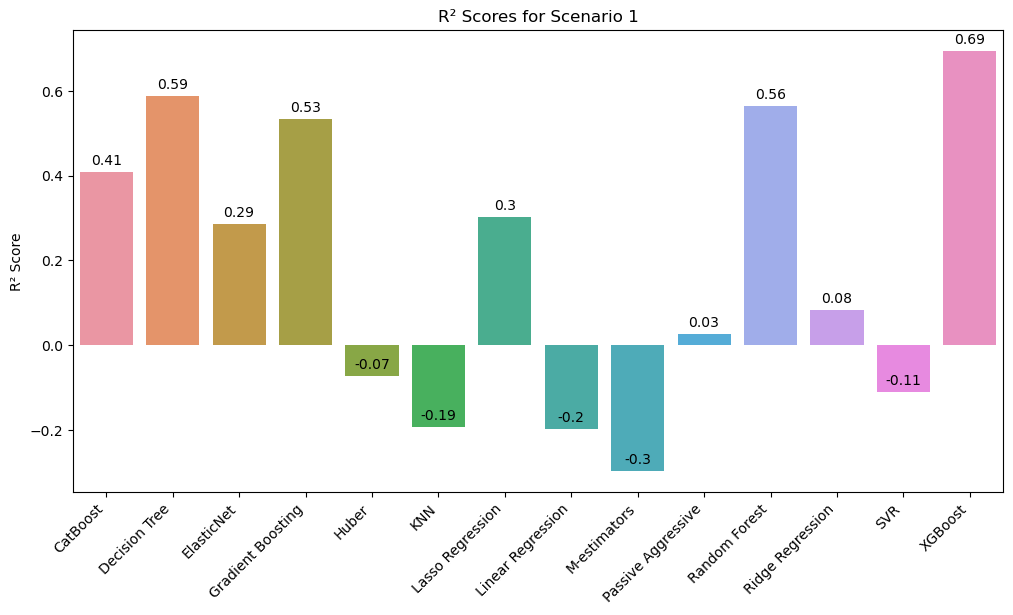


--------------------------------------------------

Scenario 2:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.257e+01, tolerance: 1.593e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.562e+01, tolerance: 1.867e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

                         MAE        MSE      RMSE        R2
CatBoost            1.794369   4.659447  2.158575  0.544789
Decision Tree       1.534568   4.117658  2.029201  0.597720
ElasticNet          3.098420  12.142605  3.484624 -0.186288
Gradient Boosting   2.030322   5.507159  2.346734  0.461971
Huber               4.846604  27.641034  5.257474 -1.700427
KNN                 3.136508  12.220408  3.495770 -0.193889
Lasso Regression    2.389144   7.245283  2.691706  0.292163
Linear Regression   2.746652  10.228756  3.198243  0.000688
M-estimators        2.285588   7.346390  2.710423  0.282285
Passive Aggressive  2.813126  10.043256  3.169110  0.018811
Random Forest       1.808778   4.572036  2.138232  0.553329
Ridge Regression    2.869584  11.508472  3.392414 -0.124335
SVR                 3.095162  11.446501  3.383268 -0.118281
XGBoost             1.458658   2.812831  1.677150  0.725197


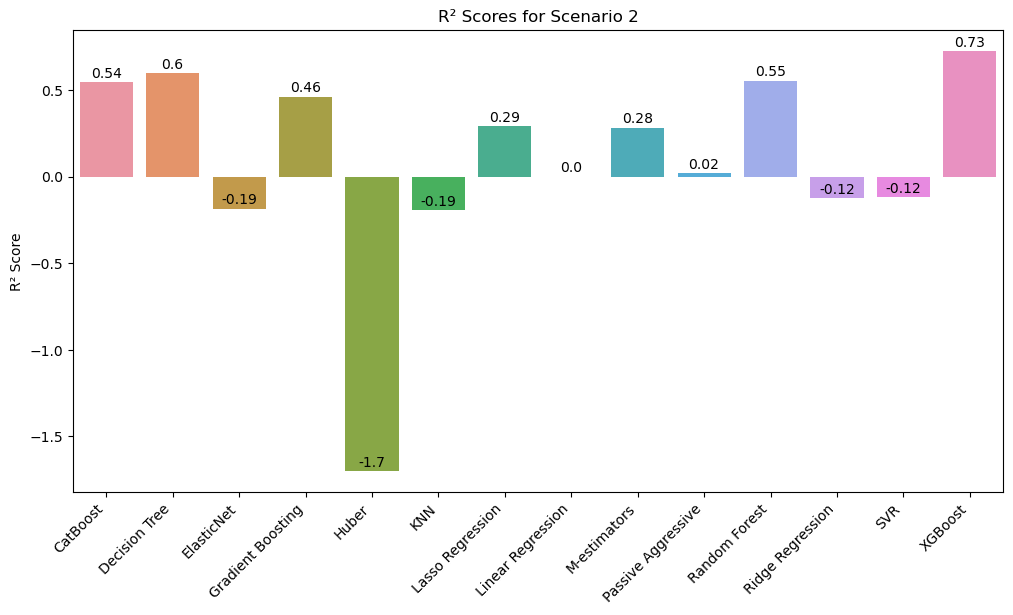


--------------------------------------------------

Scenario 3:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.865e+01, tolerance: 1.593e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.112e+01, tolerance: 1.867e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

                         MAE        MSE      RMSE        R2
CatBoost            2.170966   6.762106  2.600405  0.339367
Decision Tree       1.581944   4.212145  2.052351  0.588489
ElasticNet          3.098420  12.142605  3.484624 -0.186288
Gradient Boosting   1.905123   4.785571  2.187595  0.532467
Huber               4.554493  24.736811  4.973611 -1.416695
KNN                 3.136508  12.220408  3.495770 -0.193889
Lasso Regression    2.508160   9.642030  3.105162  0.058009
Linear Regression   3.331299  16.637674  4.078931 -0.625439
M-estimators        2.619626  10.061743  3.172025  0.017005
Passive Aggressive  2.812319  10.039436  3.168507  0.019184
Random Forest       1.876667   5.322012  2.306949  0.480059
Ridge Regression    3.272912  16.228779  4.028496 -0.585492
SVR                 3.094369  11.436988  3.381862 -0.117351
XGBoost             1.740048   4.990425  2.233926  0.512454


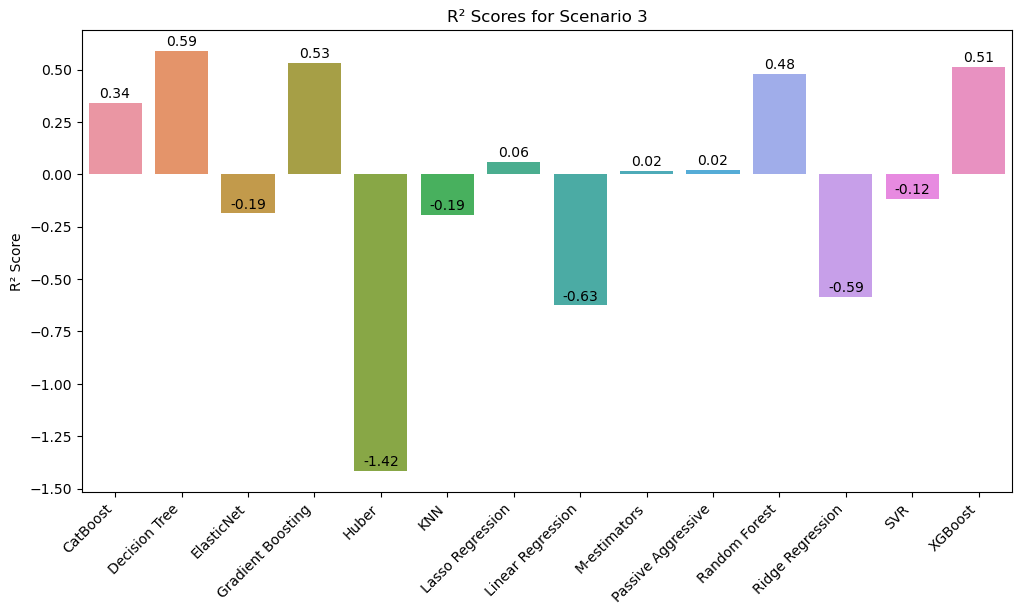


--------------------------------------------------

Scenario 4:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.472e+01, tolerance: 1.593e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.187e+01, tolerance: 1.867e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

                         MAE        MSE      RMSE        R2
CatBoost            1.785690   4.755263  2.180657  0.535428
Decision Tree       1.503704   4.084393  2.020988  0.600970
ElasticNet          3.098420  12.142605  3.484624 -0.186288
Gradient Boosting   2.053422   5.479816  2.340901  0.464642
Huber               4.707464  25.222391  5.022190 -1.464134
KNN                 3.136508  12.220408  3.495770 -0.193889
Lasso Regression    3.097374  12.134853  3.483512 -0.185530
Linear Regression   2.797550  10.809560  3.287789 -0.056054
M-estimators        1.869387   6.567966  2.562804  0.358334
Passive Aggressive  2.814073  10.048984  3.170013  0.018251
Random Forest       1.705222   4.577611  2.139535  0.552784
Ridge Regression    3.604909  14.463183  3.803049 -0.412999
SVR                 3.098626  11.457559  3.384902 -0.119361
XGBoost             1.566340   3.526844  1.877989  0.655440


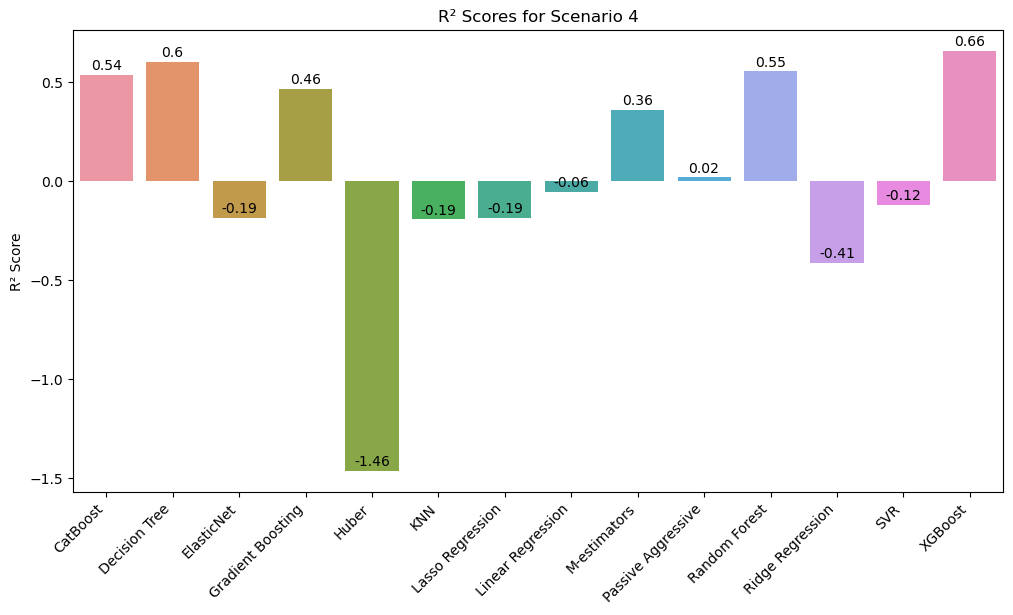


--------------------------------------------------

Scenario 5:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.369e+01, tolerance: 1.593e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.035e+01, tolerance: 1.867e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

                         MAE        MSE      RMSE        R2
CatBoost            2.125060   6.378827  2.525634  0.376812
Decision Tree       1.355556   2.654747  1.629339  0.740641
ElasticNet          3.098420  12.142605  3.484624 -0.186288
Gradient Boosting   1.902342   4.783672  2.187161  0.532653
Huber               4.864528  27.364217  5.231082 -1.673383
KNN                 3.136508  12.220408  3.495770 -0.193889
Lasso Regression    3.097374  12.134853  3.483512 -0.185530
Linear Regression   3.373254  18.006359  4.243390 -0.759155
M-estimators        4.034089  23.483669  4.845995 -1.294268
Passive Aggressive  2.813905  10.048044  3.169865  0.018343
Random Forest       1.896222   5.537765  2.353246  0.458981
Ridge Regression    3.580780  14.272465  3.777892 -0.394367
SVR                 3.095257  11.446764  3.383307 -0.118306
XGBoost             1.813145   4.595164  2.143633  0.551069


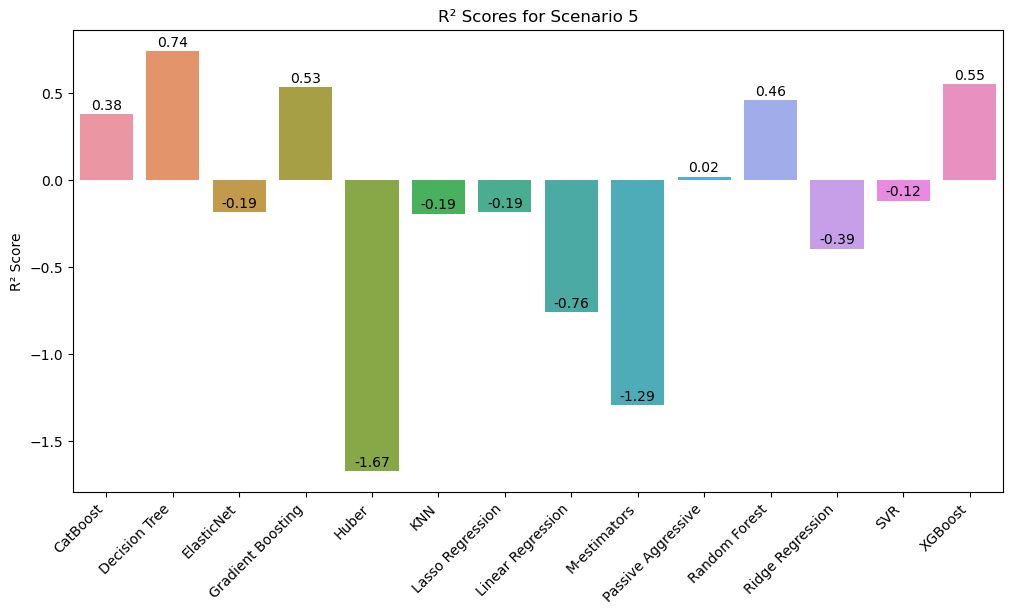


--------------------------------------------------



In [41]:
from sklearn.model_selection import GridSearchCV

# Define potential hyperparameters for tuning
hyperparameters = {
    "CatBoost": {
        "iterations": [100, 200],
        "learning_rate": [0.01, 0.05, 0.1],
        "depth": [3, 6, 9]
    },
    "Decision Tree": {
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "ElasticNet": {
        "alpha": [0.1, 1, 10],
        "l1_ratio": [0.1, 0.5, 0.9]
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 6, 9]
    },
    "Huber": {
        "epsilon": [1.0, 1.5, 2.0]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"]
    },
    "Lasso Regression": {
        "alpha": [0.1, 1, 10]
    },
    "Linear Regression": {
        # Usually no hyperparameters to tune, but you can explore fitting without an intercept
        "fit_intercept": [True, False]
    },
    "M-estimators": {
        "min_samples": [0.5, 0.6, 0.7]
    },
    "Passive Aggressive": {
        "C": [0.1, 1, 10],
        "max_iter": [1000, 2000]
    },
    "Random Forest": {
        "n_estimators": [10, 50, 100],
        "max_depth": [None, 10, 20]
    },
    "Ridge Regression": {
        "alpha": [0.1, 1, 10]
    },
    "SVR": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    },
    "XGBoost": {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.05, 0.1],
        "max_depth": [3, 6, 9]
    }
}

# Modify the function to include cross-validation and hyperparameter tuning
def train_and_evaluate_model(model, name, X_train, y_train, X_test, y_test):
    # If model has hyperparameters defined, use GridSearchCV
    if name in hyperparameters:
        grid_search = GridSearchCV(model, hyperparameters[name], cv=2, scoring='r2')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model
        best_model.fit(X_train, y_train)
    
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

# Your existing code for reading the CSV, preprocessing, and model definitions remains unchanged...

# Loop through scenarios, apply the modified function, and visualize the results
for i, scenario in enumerate(scenarios):
    print(f"Scenario {i+1}:")
    X_scenario = df[scenario]
    y_scenario = df['Seed']
    X_train_scenario, X_test_scenario, y_train_scenario, y_test_scenario = train_test_split(X_scenario, y_scenario, test_size=0.2, random_state=42)
    results_scenario = {}
    for name, model in models:
        results_scenario[name] = train_and_evaluate_model(model, name, X_train_scenario, y_train_scenario, X_test_scenario, y_test_scenario)
    results_scenario_df = pd.DataFrame(results_scenario, index=['MAE', 'MSE', 'RMSE', 'R2'])
    
    # Save to CSV
    results_scenario_df.T.to_csv(f"C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/14ML_results_scenario_2_Hyperparameter_1{i+1}.csv")

    # Print results
    print(results_scenario_df.T)
    
    # Visualize the results (R² scores) and annotate values
    plt.figure(figsize=(12, 6))
    bars = sns.barplot(x=results_scenario_df.columns, y=results_scenario_df.loc['R2'])
    plt.title(f"R² Scores for Scenario {i+1}")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('R² Score')
    for idx, value in enumerate(results_scenario_df.loc['R2']):
        plt.text(idx, value + 0.01, round(value, 2), ha='center', va='bottom')
    plt.show()
    print("\n" + "-"*50 + "\n")


Certainly! For Scenario 3, where you want to apply Feature Engineering, there are several techniques that you can use to select the most relevant features and potentially create new features. Here are some common methods:

### 1. **Correlation Analysis**:
   - Check the correlation between each feature and the target variable (Seed in this case).
   - Remove features that have very low correlation with the target variable.
   - You may also consider removing features that are highly correlated with each other, as they may contain redundant information.

### 2. **Feature Importance from Tree-Based Models**:
   - Models like Random Forest and XGBoost provide feature importance scores.
   - Use these scores to identify the most important features.
   - You can set a threshold and only keep features above this threshold.

### 3. **Recursive Feature Elimination (RFE)**:
   - This technique recursively removes the least important features.
   - You can use it with various models (like Linear Regression, Support Vector Machines) to rank features.

### 4. **Principal Component Analysis (PCA)**:
   - PCA is a dimensionality reduction technique that can transform your features into a new space.
   - This is useful if you want to reduce the number of features while retaining most of the variance in the data.

### 5. **Create Polynomial Features**:
   - Sometimes, relationships between features and the target variable are not linear.
   - You can create polynomial features that capture interactions between different features.
   - Be cautious with this approach as it can easily lead to overfitting.

### 6. **Domain Knowledge**:
   - If you have specific knowledge about the domain (e.g., agriculture), you might have insights into which features are most relevant for predicting Seed yield.

### 7. **Use SelectKBest or SelectPercentile Methods**:
   - These functions from `sklearn.feature_selection` allow you to select the top K features or a top percentage of features based on a chosen statistical test (e.g., f_regression, chi2).

### 8. **Experimentation**:
   - You can try different combinations of features and see how your model performs.
   - This can be done manually or using automated techniques like Grid Search with feature subsets.

### 9. **Visualization**:
   - Visualize the relationships between features and the target variable using scatter plots, box plots, etc.
   - This can provide insights into the features that have strong relationships with the target variable.

### 10. **Feature Scaling**:
   - Ensure that all the features are on the same scale.
   - This can be critical for models that are sensitive to the scale of the features (e.g., K-Nearest Neighbors, Support Vector Machines).

### Example:
   - For a specific scenario, you may start by calculating the correlation with the target and removing features with a correlation coefficient below a certain threshold.
   - Then, you could fit a Random Forest model and use the feature importance scores to further refine your feature selection.

Remember, feature engineering is often an iterative and experimental process. The effectiveness of different techniques may vary depending on the specific problem and data. It can be beneficial to try different approaches and validate them using cross-validation to find the best set of features for your models.

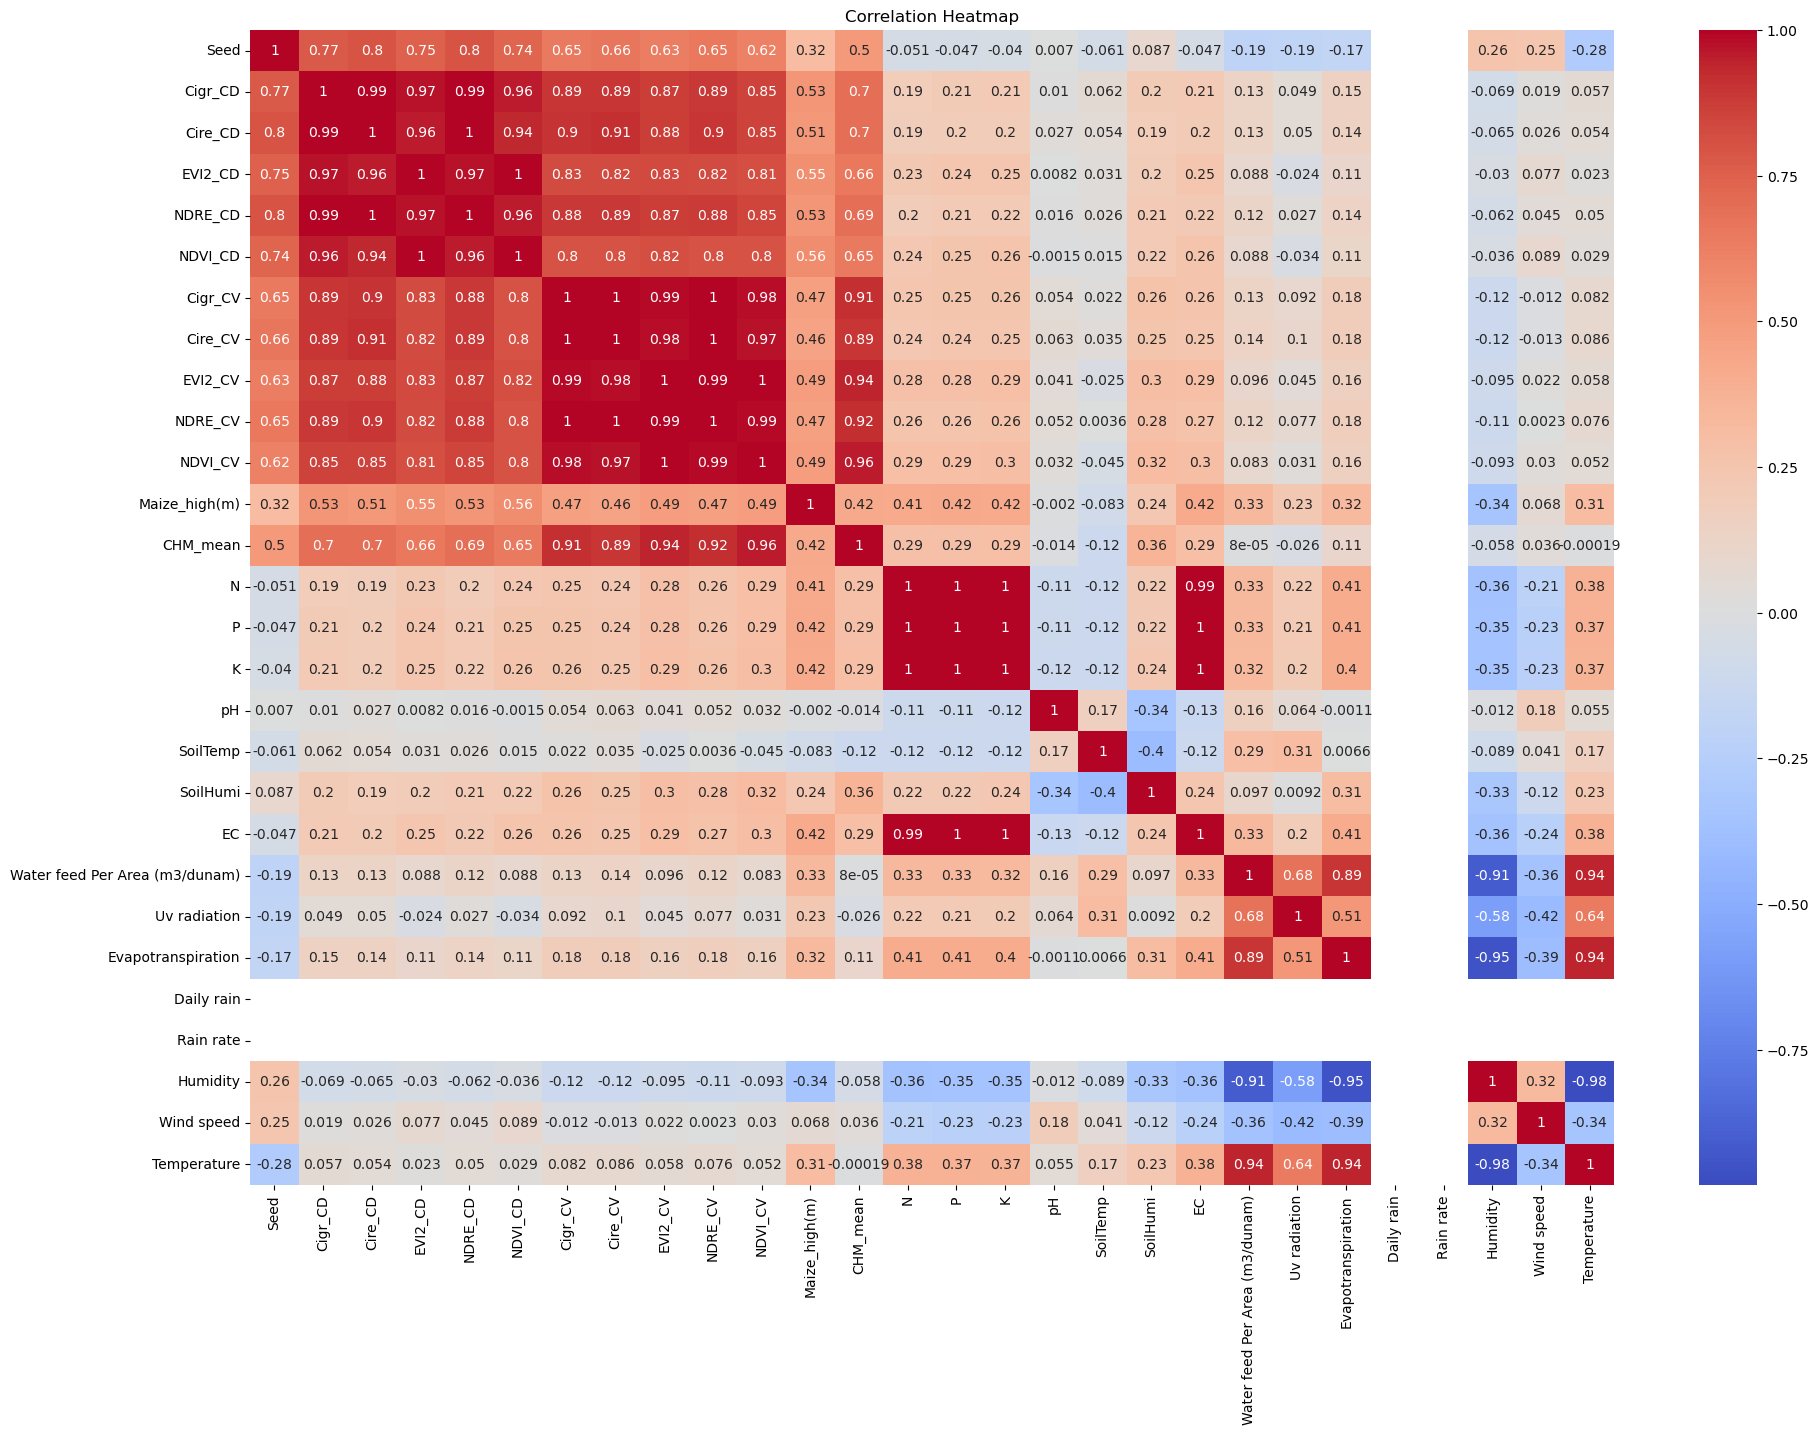

Selected Features based on Correlation Analysis:
['Cigr_CD', 'Cire_CD', 'EVI2_CD', 'NDRE_CD', 'NDVI_CD', 'Cigr_CV', 'Cire_CV', 'EVI2_CV', 'NDRE_CV', 'NDVI_CV', 'Maize_high(m)', 'CHM_mean', 'Water feed Per Area (m3/dunam)', 'Uv radiation', 'Evapotranspiration', 'Humidity', 'Wind speed', 'Temperature']


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(22, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Target correlation vector
target_correlation = correlation_matrix['Seed']

# Selecting features that have an absolute correlation above a specific threshold
threshold = 0.1
selected_features = target_correlation[abs(target_correlation) > threshold].index.tolist()
selected_features.remove('Seed') # Remove the target variable itself

# Print the selected features
print("Selected Features based on Correlation Analysis:")
print(selected_features)


Sure! Tree-based models like Random Forest and Gradient Boosting can provide insights into feature importance. These models assign a score to each feature based on how useful it is in making predictions.

Here's a step-by-step guide to using Random Forest for feature importance:

### Step 1: Train a Random Forest Model
Train a Random Forest model using all the features and target variable (`Seed`).

### Step 2: Extract Feature Importance
Extract the feature importance scores provided by the Random Forest model.

### Step 3: Visualize Feature Importance
You can visualize the feature importance scores using a bar plot.

### Step 4: Select Features Based on Importance
Select the features that have an importance score above a certain threshold.

Here's the code to achieve these steps:

```python
from sklearn.ensemble import RandomForestRegressor

# Scenario - you can loop through scenarios as before
scenario = ['Cigr_CD', 'N', 'P', 'K', 'pH', 'SoilTemp', 'SoilHumi', 'EC', 'Water feed Per Area (m3/dunam)', 'Uv radiation', 'Evapotranspiration', 'Daily rain', 'Rain rate', 'Humidity', 'Wind speed', 'Temperature']

X_scenario = df[scenario]
y_scenario = df['Seed']

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_scenario, y_scenario)

# Extract feature importance
feature_importance = rf_model.feature_importances_

# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.bar(X_scenario.columns, feature_importance)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')
plt.show()

# Selecting features based on a specific threshold
importance_threshold = 0.05
selected_features_rf = X_scenario.columns[feature_importance > importance_threshold].tolist()

# Print the selected features
print("Selected Features based on Random Forest Feature Importance:")
print(selected_features_rf)
```

Note:
- You may need to adjust the importance threshold based on your specific problem and requirements.
- Feature importance from tree-based models provides insights into which features are most influential in predicting the target variable, but it does not necessarily mean that the selected features are the best for all models.
- This method can be applied to other tree-based models like Gradient Boosting, XGBoost, and CatBoost, with similar code.

# Selected Features based on Random Forest Feature Importance:

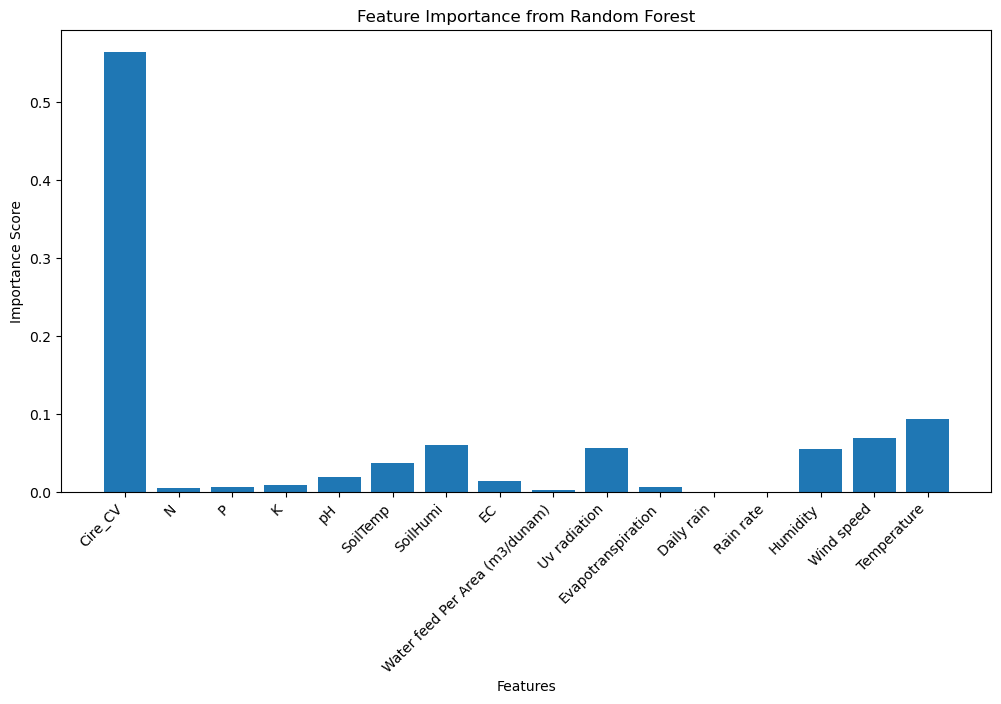

Selected Features based on Random Forest Feature Importance:
['Cire_CV', 'SoilHumi', 'Uv radiation', 'Humidity', 'Wind speed', 'Temperature']


In [53]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Reading the CSV file
file_path = "C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V6_CV_ALL.csv" # Change this to the correct path
df = pd.read_csv(file_path)

# Scenario - you can loop through scenarios as before
scenario = ['Cire_CV', 'N', 'P', 'K', 'pH', 'SoilTemp', 'SoilHumi', 'EC', 'Water feed Per Area (m3/dunam)', 'Uv radiation', 'Evapotranspiration', 'Daily rain', 'Rain rate', 'Humidity', 'Wind speed', 'Temperature']

X_scenario = df[scenario]
y_scenario = df['Seed']

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_scenario, y_scenario)

# Extract feature importance
feature_importance = rf_model.feature_importances_

# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.bar(X_scenario.columns, feature_importance)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')
plt.show()

# Selecting features based on a specific threshold
importance_threshold = 0.05
selected_features_rf = X_scenario.columns[feature_importance > importance_threshold].tolist()

# Print the selected features
print("Selected Features based on Random Forest Feature Importance:")
print(selected_features_rf)


# There are some additional methods for feature importance that can be applied to different models:

### 1. Recursive Feature Elimination (RFE):

Recursive Feature Elimination (RFE) is a backward selection method that recursively fits the model, ranks the features, and eliminates the least important ones. It can be used with any estimator that exposes the `coef_` or `feature_importances_` attribute after fitting.

Here's an example using RFE with a Random Forest Regressor:

```python
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
selector = RFE(model, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)

selected_features = selector.support_
feature_ranking = selector.ranking_

print("Selected Features:", selected_features)
print("Feature Ranking:", feature_ranking)
```

### 2. Permutation Feature Importance:

Permutation feature importance is a technique to approximate the change in model performance when the values of a feature are randomly shuffled. It can provide insight into the importance of individual features in making predictions.

Here's how you can use permutation feature importance with a Random Forest model:

```python
from sklearn.inspection import permutation_importance

model = RandomForestRegressor()
model.fit(X_train, y_train)
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

for i, imp in enumerate(result.importances_mean):
    print(f"Feature {i}: {imp}")
```

### 3. SHAP Values:

SHAP (SHapley Additive exPlanations) values provide a unified measure of feature importance, explaining the output of any machine learning model.

Here's an example of using SHAP with an XGBoost model:

```python
import shap

model = XGBRegressor()
model.fit(X_train, y_train)

explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)
```

### 4. L1 Regularization (Lasso):

L1 regularization, or Lasso, can also be used to determine feature importance by penalizing the coefficients of non-important features, forcing them to be exactly zero.

Here's an example:

```python
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

feature_importance = np.abs(model.coef_)
print("Feature Importance:", feature_importance)
```

These methods provide different ways to assess the importance of features and can help you understand how each feature contributes to the model's predictions. Depending on the model and data, different methods might provide slightly different perspectives on feature importance, so it's often useful to try multiple approaches.

1. Recursive Feature Elimination (RFE):
The Recursive Feature Elimination (RFE) result provides two main pieces of information:

1. **Selected Features**: This is a boolean array that indicates whether a feature was selected (True) or not (False). In your case, the features at indices 0, 6, 9, 14, and 15 are selected.

2. **Feature Ranking**: This array represents the ranking of each feature. The most important features have a rank of 1, and the least important features have higher ranks. In your case, the features with a ranking of 1 are the selected features.

### Explanation of the Result:

Based on the selected features and their ranking, the features at positions 0, 6, 9, 14, and 15 in the scenario list are considered the most important for predicting the target variable 'Seed'. The other features have been ranked in order of their importance, with the feature at index 1 being the 10th most important, the feature at index 2 being the 8th most important, and so on.

### Visualization:

You can visualize the feature importance by creating a bar plot, using the ranking or selected features. Here's how you can plot the ranking:

```python
import matplotlib.pyplot as plt

features = np.array(scenario)
ranking = [1, 10, 8, 6, 4, 3, 1, 5, 7, 1, 9, 12, 11, 2, 1, 1]
selected_features = [True, False, False, False, False, False, True, False, False, True, False, False, False, False, True, True]

# Plotting the feature ranking
plt.figure(figsize=(12, 6))
plt.bar(features, ranking)
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title('Feature Importance Ranking (Lower is better)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plotting the selected features
plt.figure(figsize=(12, 6))
plt.bar(features, selected_features)
plt.xlabel('Features')
plt.ylabel('Selected (1=True, 0=False)')
plt.title('Selected Features')
plt.xticks(rotation=45, ha='right')
plt.show()
```

The first plot shows the ranking of the features, where lower values indicate more importance. The second plot shows the selected features as binary values, with 1 indicating that the feature was selected by RFE.

You can analyze these plots to understand which features are most relevant to your model and may consider building a model with only those selected features to potentially improve performance and interpretability.

In [55]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor


import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Reading the CSV file
file_path = "C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V6_CV_ALL.csv" # Change this to the correct path
df = pd.read_csv(file_path)

# Scenario - you can loop through scenarios as before
scenario = ['Cire_CV', 'N', 'P', 'K', 'pH', 'SoilTemp', 'SoilHumi', 'EC', 'Water feed Per Area (m3/dunam)', 'Uv radiation', 'Evapotranspiration', 'Daily rain', 'Rain rate', 'Humidity', 'Wind speed', 'Temperature']

X_train = df[scenario]
y_train = df['Seed']

model = RandomForestRegressor()
selector = RFE(model, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)

selected_features = selector.support_
feature_ranking = selector.ranking_

print("Selected Features:", selected_features)
print("Feature Ranking:", feature_ranking)


Selected Features: [ True False False False False False  True False False  True False False
 False False  True  True]
Feature Ranking: [ 1 10  8  6  4  3  1  5  7  1  9 12 11  2  1  1]


Visualization:

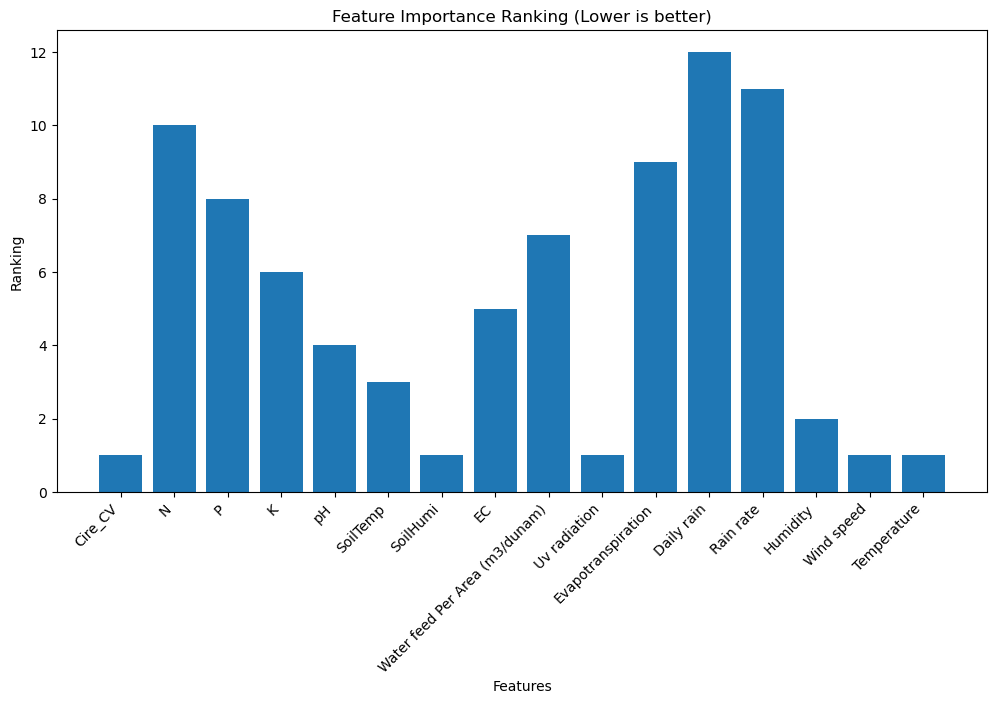

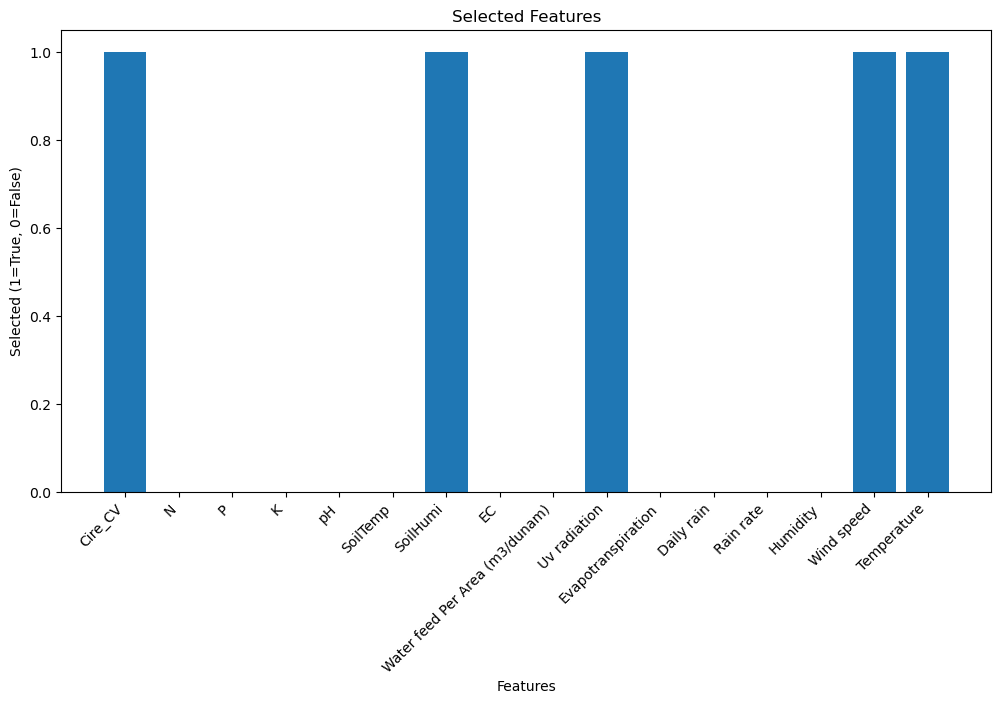

In [56]:
import matplotlib.pyplot as plt

features = np.array(scenario)
ranking = [1, 10, 8, 6, 4, 3, 1, 5, 7, 1, 9, 12, 11, 2, 1, 1]
selected_features = [True, False, False, False, False, False, True, False, False, True, False, False, False, False, True, True]

# Plotting the feature ranking
plt.figure(figsize=(12, 6))
plt.bar(features, ranking)
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title('Feature Importance Ranking (Lower is better)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plotting the selected features
plt.figure(figsize=(12, 6))
plt.bar(features, selected_features)
plt.xlabel('Features')
plt.ylabel('Selected (1=True, 0=False)')
plt.title('Selected Features')
plt.xticks(rotation=45, ha='right')
plt.show()


# 2. Permutation Feature Importance: and visualize
Permutation Feature Importance is a technique used to estimate the importance of individual features to the prediction of a model. It works by randomly shuffling a single feature and measuring the change in the model's performance. A large change in performance indicates a high importance for that feature, while a small change indicates low importance.

Here's how you can apply Permutation Feature Importance to your scenario and visualize the result:

1. **Fit a Model**: Choose a model that you want to interpret. You may use a model that performed well in your previous analysis.

2. **Compute Permutation Importances**: Use the `permutation_importance` function from `sklearn` to calculate the importance.

3. **Visualize the Result**: Plot the importance scores for each feature.

```python
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Scenario
scenario = ['Cire_CV', 'N', 'P', 'K', 'pH', 'SoilTemp', 'SoilHumi', 'EC', 'Water feed Per Area (m3/dunam)', 'Uv radiation', 'Evapotranspiration', 'Daily rain', 'Rain rate', 'Humidity', 'Wind speed', 'Temperature']

X = df[scenario]
y = df['Seed']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a model (you can choose another model if you prefer)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Compute Permutation Importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Visualize the importance
plt.figure(figsize=(12, 6))
plt.bar(scenario, result.importances_mean)
plt.xlabel('Features')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()
```

This code will plot the permutation importance of each feature in the given scenario. High values indicate features that, when permuted, significantly impact the model's performance, meaning they are important for predictions. Conversely, low values indicate less important features.

Note: The permutation importance can be computationally expensive for large datasets or complex models, as it involves fitting the model multiple times. Make sure to consider this if you have a large dataset.


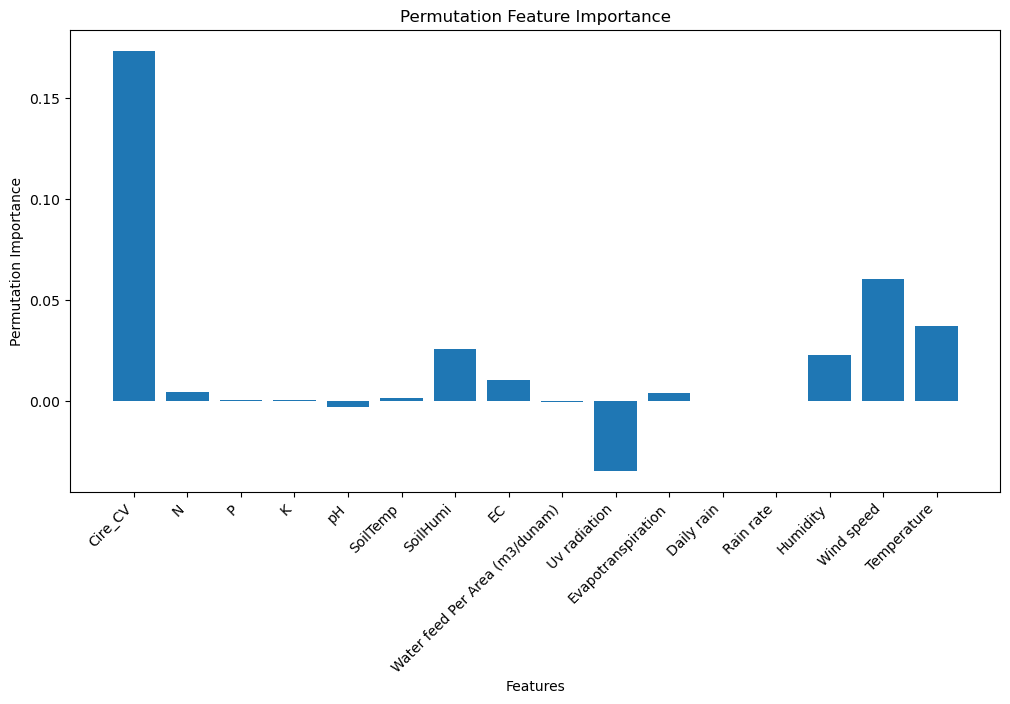

In [57]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Reading the CSV file
file_path = "C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V6_CV_ALL.csv" # Change this to the correct path
df = pd.read_csv(file_path)

# Scenario
scenario = ['Cire_CV', 'N', 'P', 'K', 'pH', 'SoilTemp', 'SoilHumi', 'EC', 'Water feed Per Area (m3/dunam)', 'Uv radiation', 'Evapotranspiration', 'Daily rain', 'Rain rate', 'Humidity', 'Wind speed', 'Temperature']

X = df[scenario]
y = df['Seed']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a model (you can choose another model if you prefer)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Compute Permutation Importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Visualize the importance
plt.figure(figsize=(12, 6))
plt.bar(scenario, result.importances_mean)
plt.xlabel('Features')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()


# 3. SHAP Values:
SHAP (SHapley Additive exPlanations) values provide a way to interpret the output of machine learning models by assigning an importance value to each feature for a particular prediction. SHAP values are based on cooperative game theory and provide a fair way to distribute the contribution of each feature to the prediction.

To calculate and visualize SHAP values, you need to install the SHAP library and use one of the supported models. Here's an example using a Random Forest Regressor:

1. **Install SHAP**: You can install the SHAP library using pip or conda.
   
2. **Fit a Model**: Choose a model that you want to interpret.

3. **Calculate SHAP Values**: Use the SHAP library to calculate the values.

4. **Visualize the Result**: Plot the SHAP values for each feature.

```python
import shap
from sklearn.ensemble import RandomForestRegressor

# Scenario
scenario = ['Cire_CV', 'N', 'P', 'K', 'pH', 'SoilTemp', 'SoilHumi', 'EC', 'Water feed Per Area (m3/dunam)', 'Uv radiation', 'Evapotranspiration', 'Daily rain', 'Rain rate', 'Humidity', 'Wind speed', 'Temperature']

X = df[scenario]
y = df['Seed']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a model (you can choose another model if you prefer)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Create a SHAP explainer object
explainer = shap.Explainer(model)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Visualize the SHAP values for the entire test set
shap.summary_plot(shap_values, X_test, plot_type="bar")
```

The `shap.summary_plot` function provides a bar plot that shows the average impact of each feature on the model's output. Features are sorted by the sum of their SHAP value magnitudes across all samples.

You can also visualize the SHAP values for individual instances or use other SHAP plots like `shap.dependence_plot` to understand the effect of a single feature across all samples.

Note: SHAP values can be computationally intensive to calculate, especially for large datasets or complex models, so be mindful of this when using them.

In [59]:
import shap
from sklearn.ensemble import RandomForestRegressor

# Reading the CSV file
file_path = "C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V6_CV_ALL.csv" # Change this to the correct path
df = pd.read_csv(file_path)

# Scenario
scenario = ['Cire_CV', 'N', 'P', 'K', 'pH', 'SoilTemp', 'SoilHumi', 'EC', 'Water feed Per Area (m3/dunam)', 'Uv radiation', 'Evapotranspiration', 'Daily rain', 'Rain rate', 'Humidity', 'Wind speed', 'Temperature']

X = df[scenario]
y = df['Seed']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a model (you can choose another model if you prefer)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Create a SHAP explainer object
explainer = shap.Explainer(model)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Visualize the SHAP values for the entire test set
shap.summary_plot(shap_values, X_test, plot_type="bar")


ModuleNotFoundError: No module named 'shap'

Scenario 1:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.560225   3.568052  1.888929  0.651415
Decision Tree       2.255556   8.494444  2.914523  0.170124
ElasticNet          2.526106   8.207154  2.864813  0.198191
Gradient Boosting   1.648735   4.607272  2.146456  0.549887
Huber               1.694989   5.141131  2.267406  0.497731
KNN                 3.160000  11.966222  3.459223 -0.169056
Lasso Regression    2.614986   8.700918  2.949732  0.149953
Linear Regression   1.904739   5.804516  2.409256  0.432920
M-estimators        3.365164  14.607903  3.822029 -0.427138
Passive Aggressive  3.300995  12.889526  3.590199 -0.259259
Random Forest       1.549444   4.197551  2.048793  0.589915
Ridge Regression    1.871848   5.567226  2.359497  0.456103
SVR                 3.199087  12.362782  3.516075 -0.207798
XGBoost             1.462407   2.856626  1.690156  0.720918

--------------------------------------------------

Scenario 2:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.456049   2.974496  1.724673  0.709403
Decision Tree       1.966667   6.912222  2.629111  0.324701
ElasticNet          3.188586  12.620884  3.552588 -0.233014
Gradient Boosting   1.293258   3.120317  1.766442  0.695157
Huber               1.640300   4.910485  2.215961  0.520264
KNN                 3.222222  12.399289  3.521262 -0.211365
Lasso Regression    3.230908  12.933151  3.596269 -0.263521
Linear Regression   1.878965   5.605133  2.367516  0.452399
M-estimators        3.049258  12.100498  3.478577 -0.182174
Passive Aggressive  3.614573  16.376772  4.046822 -0.599950
Random Forest       1.508889   3.925074  1.981180  0.616535
Ridge Regression    2.098621   6.225842  2.495164  0.391758
SVR                 3.206173  12.458930  3.529721 -0.217191
XGBoost             1.000599   1.581558  1.257600  0.845488

--------------------------------------------------

Scenario 3:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.750959   4.208235  2.051398  0.588871
Decision Tree       1.777778   6.435556  2.536840  0.371270
ElasticNet          2.964960  10.940564  3.307652 -0.068853
Gradient Boosting   1.460329   3.757086  1.938320  0.632947
Huber               1.776371   5.434183  2.331134  0.469100
KNN                 3.222222  12.399289  3.521262 -0.211365
Lasso Regression    3.035170  11.437551  3.381945 -0.117406
Linear Regression   1.960752   6.186628  2.487293  0.395589
M-estimators        4.380679  26.357042  5.133911 -1.574985
Passive Aggressive  3.538578  15.410032  3.925561 -0.505503
Random Forest       1.558000   4.319746  2.078400  0.577977
Ridge Regression    1.989210   6.073707  2.464489  0.406621
SVR                 3.205415  12.442178  3.527347 -0.215555
XGBoost             1.232332   2.229999  1.493318  0.782137

--------------------------------------------------

Scenario 4:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.568324   3.405732  1.845463  0.667273
Decision Tree       2.166667   8.130000  2.851315  0.205729
ElasticNet          3.234702  12.995072  3.604868 -0.269570
Gradient Boosting   1.620679   4.450427  2.109603  0.565210
Huber               1.957361   5.640817  2.375040  0.448913
KNN                 3.222222  12.399289  3.521262 -0.211365
Lasso Regression    3.230908  12.933151  3.596269 -0.263521
Linear Regression   1.886641   5.700531  2.387578  0.443079
M-estimators        3.222278  13.575233  3.684458 -0.326250
Passive Aggressive  3.637854  16.651906  4.080675 -0.626830
Random Forest       1.565000   4.353179  2.086427  0.574711
Ridge Regression    2.710274   9.214642  3.035563  0.099764
SVR                 3.206135  12.462511  3.530228 -0.217541
XGBoost             1.325536   2.388716  1.545547  0.766631

--------------------------------------------------

Scenario 5:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.660477   4.534477  2.129431  0.556998
Decision Tree       1.377778   2.257778  1.502590  0.779423
ElasticNet          3.224486  12.910854  3.593168 -0.261343
Gradient Boosting   1.537894   4.366549  2.089629  0.573404
Huber               1.934437   5.744405  2.396749  0.438793
KNN                 3.222222  12.399289  3.521262 -0.211365
Lasso Regression    3.230908  12.933151  3.596269 -0.263521
Linear Regression   2.004356   6.383094  2.526479  0.376395
M-estimators        5.194393  36.844138  6.069937 -2.599536
Passive Aggressive  3.617433  16.376082  4.046737 -0.599883
Random Forest       1.597667   4.845673  2.201289  0.526596
Ridge Regression    2.249617   7.019516  2.649437  0.314219
SVR                 3.206484  12.460991  3.530013 -0.217393
XGBoost             1.369652   2.989806  1.729106  0.707907

--------------------------------------------------

Scenario 1:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.560225   3.568052  1.888929  0.651415
Decision Tree       2.255556   8.494444  2.914523  0.170124
ElasticNet          2.526106   8.207154  2.864813  0.198191
Gradient Boosting   1.648735   4.607272  2.146456  0.549887
Huber               1.694989   5.141131  2.267406  0.497731
KNN                 3.160000  11.966222  3.459223 -0.169056
Lasso Regression    2.614986   8.700918  2.949732  0.149953
Linear Regression   1.904739   5.804516  2.409256  0.432920
M-estimators        3.365164  14.607903  3.822029 -0.427138
Passive Aggressive  3.300995  12.889526  3.590199 -0.259259
Random Forest       1.549444   4.197551  2.048793  0.589915
Ridge Regression    1.871848   5.567226  2.359497  0.456103
SVR                 3.199087  12.362782  3.516075 -0.207798
XGBoost             1.462407   2.856626  1.690156  0.720918


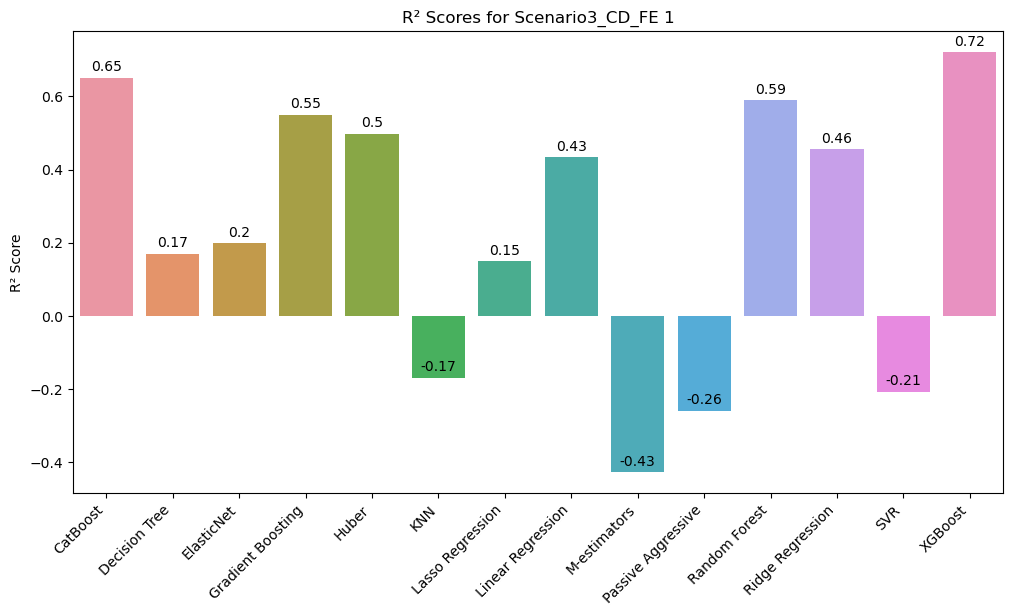


--------------------------------------------------

Scenario 2:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.456049   2.974496  1.724673  0.709403
Decision Tree       1.966667   6.912222  2.629111  0.324701
ElasticNet          3.188586  12.620884  3.552588 -0.233014
Gradient Boosting   1.293258   3.120317  1.766442  0.695157
Huber               1.640300   4.910485  2.215961  0.520264
KNN                 3.222222  12.399289  3.521262 -0.211365
Lasso Regression    3.230908  12.933151  3.596269 -0.263521
Linear Regression   1.878965   5.605133  2.367516  0.452399
M-estimators        3.049258  12.100498  3.478577 -0.182174
Passive Aggressive  3.614573  16.376772  4.046822 -0.599950
Random Forest       1.508889   3.925074  1.981180  0.616535
Ridge Regression    2.098621   6.225842  2.495164  0.391758
SVR                 3.206173  12.458930  3.529721 -0.217191
XGBoost             1.000599   1.581558  1.257600  0.845488


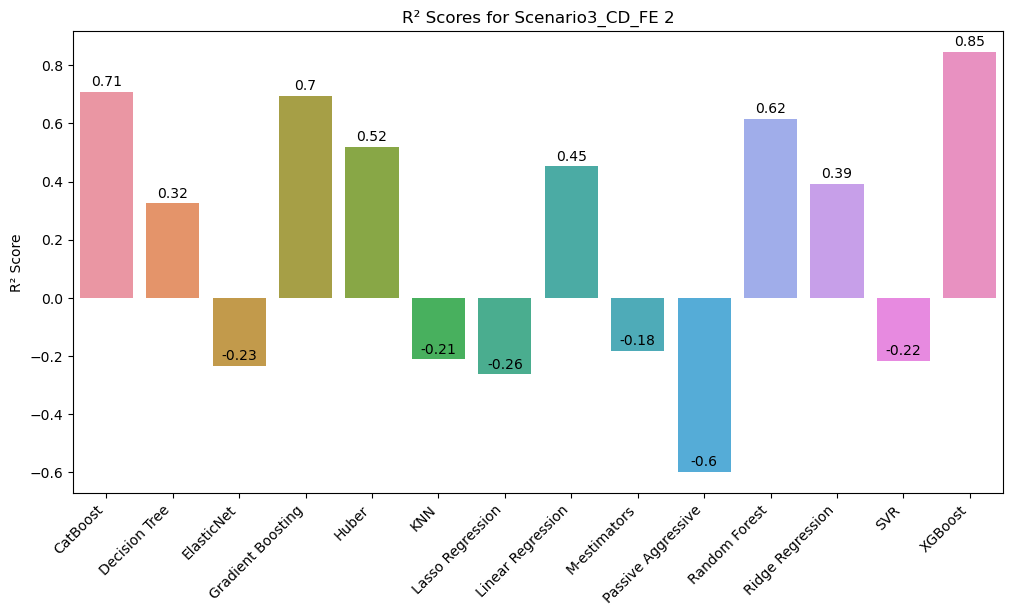


--------------------------------------------------

Scenario 3:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.750959   4.208235  2.051398  0.588871
Decision Tree       1.777778   6.435556  2.536840  0.371270
ElasticNet          2.964960  10.940564  3.307652 -0.068853
Gradient Boosting   1.460329   3.757086  1.938320  0.632947
Huber               1.776371   5.434183  2.331134  0.469100
KNN                 3.222222  12.399289  3.521262 -0.211365
Lasso Regression    3.035170  11.437551  3.381945 -0.117406
Linear Regression   1.960752   6.186628  2.487293  0.395589
M-estimators        4.380679  26.357042  5.133911 -1.574985
Passive Aggressive  3.538578  15.410032  3.925561 -0.505503
Random Forest       1.558000   4.319746  2.078400  0.577977
Ridge Regression    1.989210   6.073707  2.464489  0.406621
SVR                 3.205415  12.442178  3.527347 -0.215555
XGBoost             1.232332   2.229999  1.493318  0.782137


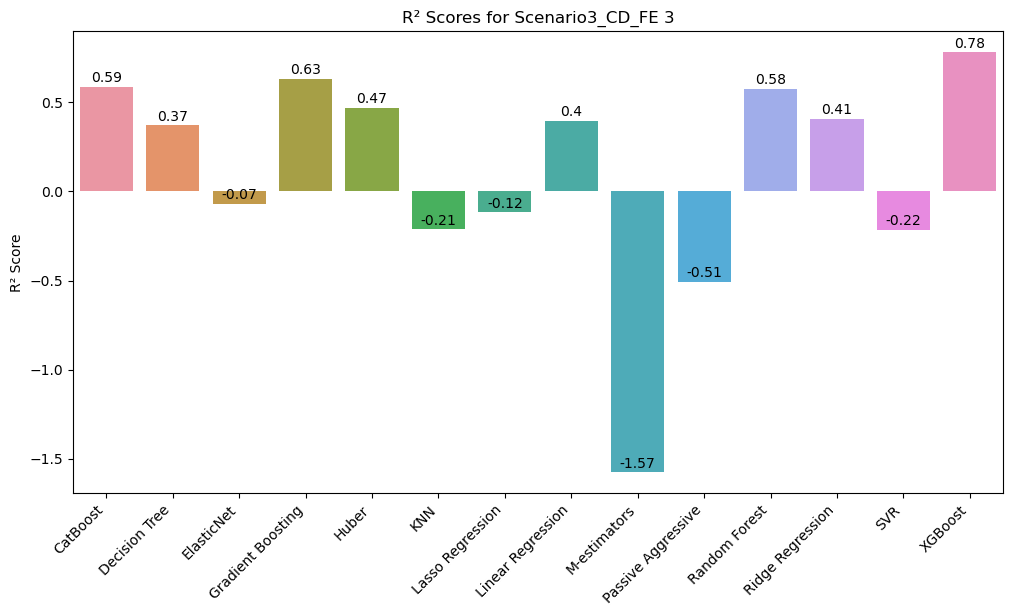


--------------------------------------------------

Scenario 4:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.568324   3.405732  1.845463  0.667273
Decision Tree       2.166667   8.130000  2.851315  0.205729
ElasticNet          3.234702  12.995072  3.604868 -0.269570
Gradient Boosting   1.620679   4.450427  2.109603  0.565210
Huber               1.957361   5.640817  2.375040  0.448913
KNN                 3.222222  12.399289  3.521262 -0.211365
Lasso Regression    3.230908  12.933151  3.596269 -0.263521
Linear Regression   1.886641   5.700531  2.387578  0.443079
M-estimators        3.222278  13.575233  3.684458 -0.326250
Passive Aggressive  3.637854  16.651906  4.080675 -0.626830
Random Forest       1.565000   4.353179  2.086427  0.574711
Ridge Regression    2.710274   9.214642  3.035563  0.099764
SVR                 3.206135  12.462511  3.530228 -0.217541
XGBoost             1.325536   2.388716  1.545547  0.766631


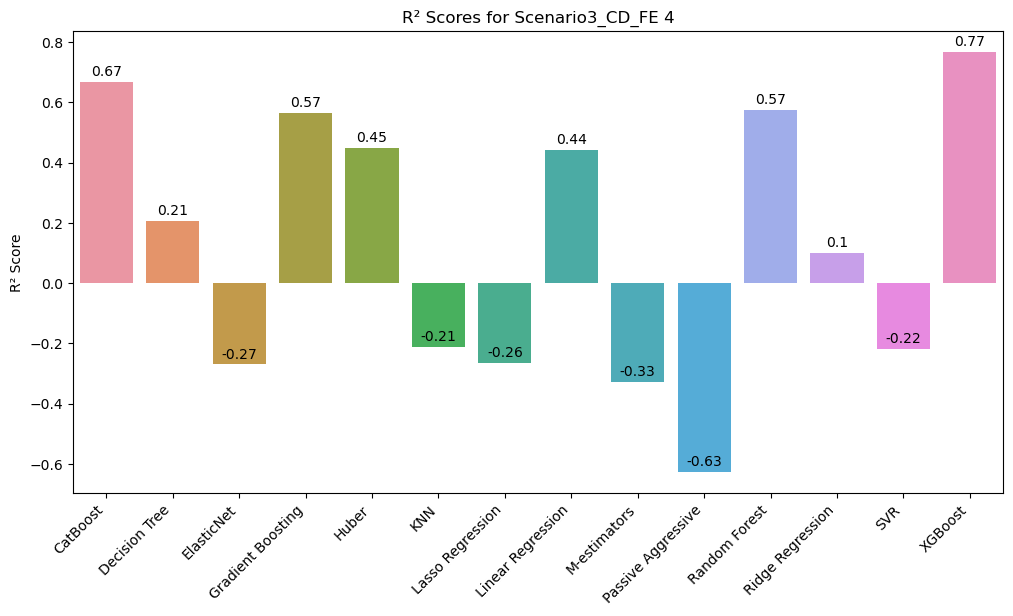


--------------------------------------------------

Scenario 5:


c:\Users\Nisit\anaconda3\envs\qgisconda\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                         MAE        MSE      RMSE        R2
CatBoost            1.660477   4.534477  2.129431  0.556998
Decision Tree       1.377778   2.257778  1.502590  0.779423
ElasticNet          3.224486  12.910854  3.593168 -0.261343
Gradient Boosting   1.537894   4.366549  2.089629  0.573404
Huber               1.934437   5.744405  2.396749  0.438793
KNN                 3.222222  12.399289  3.521262 -0.211365
Lasso Regression    3.230908  12.933151  3.596269 -0.263521
Linear Regression   2.004356   6.383094  2.526479  0.376395
M-estimators        5.194393  36.844138  6.069937 -2.599536
Passive Aggressive  3.617433  16.376082  4.046737 -0.599883
Random Forest       1.597667   4.845673  2.201289  0.526596
Ridge Regression    2.249617   7.019516  2.649437  0.314219
SVR                 3.206484  12.460991  3.530013 -0.217393
XGBoost             1.369652   2.989806  1.729106  0.707907


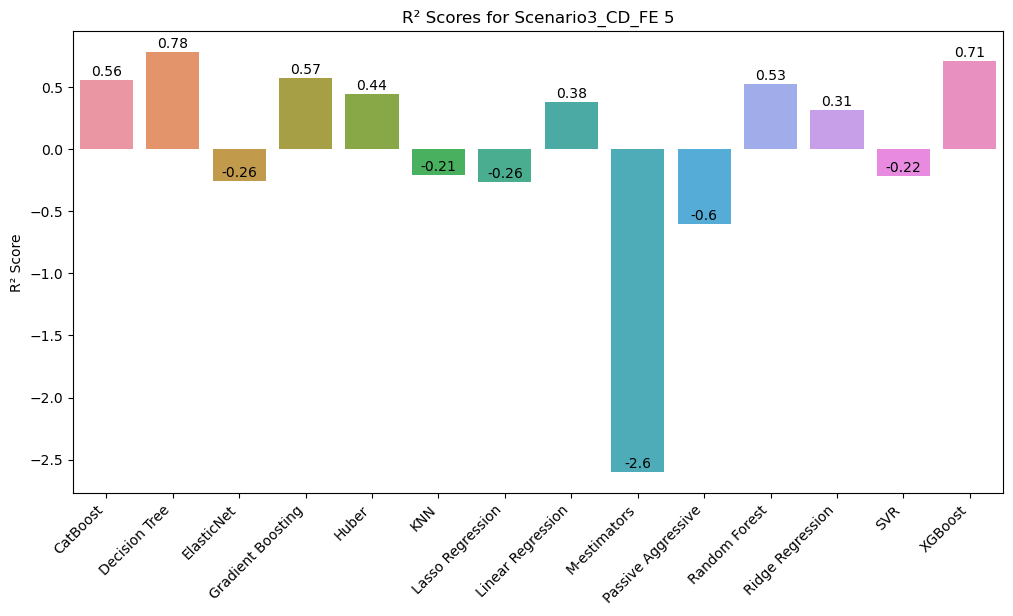


--------------------------------------------------



In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, PassiveAggressiveRegressor, RANSACRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

# Reading the CSV file
file_path = "C:/Maize_Chainat_C/45Datapoint_Master/5VI_RawData_30Mar_Multiparameter_V6_CV_ALL.csv" # Change this to the correct path
df = pd.read_csv(file_path)

# Data Preprocessing: Dropping unnecessary columns and handling missing values
columns_to_drop = ['id', 'Plot_Name']
df = df.drop(columns=columns_to_drop)
df = df.dropna()  # Handle missing values

# Models Definition 
models = [
    ("CatBoost", CatBoostRegressor(verbose=0, random_state=42)),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("ElasticNet", ElasticNet()),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("Huber", HuberRegressor()),
    ("KNN", KNeighborsRegressor()),
    ("Lasso Regression", Lasso()),
    ("Linear Regression", LinearRegression()),
    ("M-estimators", RANSACRegressor(random_state=42)),
    ("Passive Aggressive", PassiveAggressiveRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Ridge Regression", Ridge()),
    ("SVR", SVR()),
    ("XGBoost", XGBRegressor(random_state=42))

]


#6 Feature P','K', 'SoilHumi','Wind speed','Temperature','Evapotranspiration',
#Selected Features based on Random Forest Feature Importance:
# Scenario 3: ['Cigr_CD', 'SoilHumi', 'Uv radiation', 'Humidity', 'Wind speed', 'Temperature']
scenarios = [
    ['Cigr_CV', 'P','K', 'SoilHumi','Wind speed','Temperature','Evapotranspiration'],
    ['Cire_CV', 'P','K', 'SoilHumi','Wind speed','Temperature','Evapotranspiration'],
    ['EVI2_CV', 'P','K', 'SoilHumi','Wind speed','Temperature','Evapotranspiration'],
    ['NDRE_CV', 'P','K', 'SoilHumi','Wind speed','Temperature','Evapotranspiration'],
    ['NDVI_CV', 'P','K', 'SoilHumi','Wind speed','Temperature','Evapotranspiration']
#From 
    # ['Cigr_CV', 'SoilHumi', 'Uv radiation', 'Humidity', 'Wind speed', 'Temperature'],
    # ['Cire_CV', 'SoilHumi', 'Uv radiation', 'Humidity', 'Wind speed', 'Temperature'],
    # ['EVI2_CV', 'SoilHumi', 'Uv radiation', 'Humidity', 'Wind speed', 'Temperature'],
    # ['NDRE_CV', 'SoilHumi', 'Uv radiation', 'Humidity', 'Wind speed', 'Temperature'],
    # ['NDVI_CV', 'SoilHumi', 'Uv radiation', 'Humidity', 'Wind speed', 'Temperature']
]

# Loop through scenarios and evaluate the models
for i, scenario in enumerate(scenarios):
    print(f"Scenario {i+1}:")
    X_scenario = df[scenario]
    y_scenario = df['Seed']
    X_train_scenario, X_test_scenario, y_train_scenario, y_test_scenario = train_test_split(X_scenario, y_scenario, test_size=0.2, random_state=42)
    results_scenario = {}
    for name, model in models:
        results_scenario[name] = train_and_evaluate_model(model, X_train_scenario, y_train_scenario, X_test_scenario, y_test_scenario)
    results_scenario_df = pd.DataFrame(results_scenario, index=['MAE', 'MSE', 'RMSE', 'R2'])
    print(results_scenario_df.T)
    print("\n" + "-"*50 + "\n")

# Loop through scenarios and evaluate the models
for i, scenario in enumerate(scenarios):
    print(f"Scenario {i+1}:")
    X_scenario = df[scenario]
    y_scenario = df['Seed']
    X_train_scenario, X_test_scenario, y_train_scenario, y_test_scenario = train_test_split(X_scenario, y_scenario, test_size=0.2, random_state=42)
    results_scenario = {}
    for name, model in models:
        results_scenario[name] = train_and_evaluate_model(model, X_train_scenario, y_train_scenario, X_test_scenario, y_test_scenario)
    results_scenario_df = pd.DataFrame(results_scenario, index=['MAE', 'MSE', 'RMSE', 'R2'])
    
    # Save to CSV
    results_scenario_df.T.to_csv(f"C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/14ML_results_scenario3_CV_FeatureImportance{i+1}.csv")

    # Print results
    print(results_scenario_df.T)
    
    # # Visualize the results (R² scores)
    # plt.figure(figsize=(12, 6))
    # sns.barplot(x=results_scenario_df.columns, y=results_scenario_df.loc['R2'])
    # plt.title(f"R² Scores for Scenario {i+1}")
    # plt.xticks(rotation=45, ha='right')
    # plt.ylabel('R² Score')
    # plt.show()

    # print("\n" + "-"*50 + "\n")



    # Visualize the results (R² scores) and Antonate value
    plt.figure(figsize=(12, 6))
    bars = sns.barplot(x=results_scenario_df.columns, y=results_scenario_df.loc['R2'])
    plt.title(f"R² Scores for Scenario3_CD_FE {i+1}")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('R² Score')

    # Adding annotations for R2 values
    for idx, value in enumerate(results_scenario_df.loc['R2']):
        plt.text(idx, value + 0.01, round(value, 2), ha='center', va='bottom')

    plt.show()

    print("\n" + "-"*50 + "\n")


import matplotlib.pyplot as plt
def plot_model_performance(results, title):
    results_sorted = results.sort_values(by='R2', ascending=False)
    plt.figure(figsize=(12, 6))
    bars = plt.bar(results_sorted.index, results_sorted['R2'])
    plt.title(title)
    plt.xlabel('Model')
    plt.ylabel('R2 Score')
    plt.xticks(rotation=45, ha='right')

    # Adding annotations for R2 values
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

    plt.show()

    plot_model_performance(results_scenario_1, "Scenario 1: CIgr_CD and All Environment")
# Repeat for other scenarios...


